In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:

sns.set_context("paper")

color_set=['deep','muted','pastel','bright','dark','colorblind']
sns.set_palette(color_set[1])




large=12
med=9
small=6
ss=10
sss=8
ssss=6


matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600
 
matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'   # normal (or roman), italic or oblique
matplotlib.rcParams['font.weight']='bold'   # normal bold bolder lighter, 100, 200, 300, ..., 900
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =sss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =ss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss



matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5



matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20


ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8


#matplotlib.rcParams['xtick.direction'] = 'in'

# 1 数据导入及处理

## 1.1 数据导入

In [3]:

data_train = pd.read_excel('data_train.xlsx')
data_test = pd.read_excel('data_test.xlsx')
data_final_test = pd.read_excel('data_final_test.xlsx')

In [4]:

#print(data_train.info())
#print(data_test.info())

#data_train = data_train.astype(float)
#data_test = data_test.astype(float)

## 1.2 划分训练集和测试集

In [5]:

X_train = data_train.drop(['S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E','Formation_Energy'], axis=1)
y_train = data_train.iloc[:,0]

X_col = X_train.columns


X_test = data_test.drop(['S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E','Formation_Energy'], axis=1)
y_test = data_test.iloc[:,0]


X_final_test = data_final_test.drop(['S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E','Formation_Energy'], axis=1)
y_final_test = data_final_test.iloc[:,0]

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)  

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard,columns=X_col)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_col)

In [7]:
X_train_standard_np = X_train_standard.values
X_test_standard_np = X_test_standard.values
y_train_np = y_train.values
y_test_np = y_test.values
y_final_test_np = y_final_test.values

Mean Absolute Error MAE: 0.005980455430897707
test rmse scores :  0.007733319632086329
test R2 scores :  0.9760167883179002


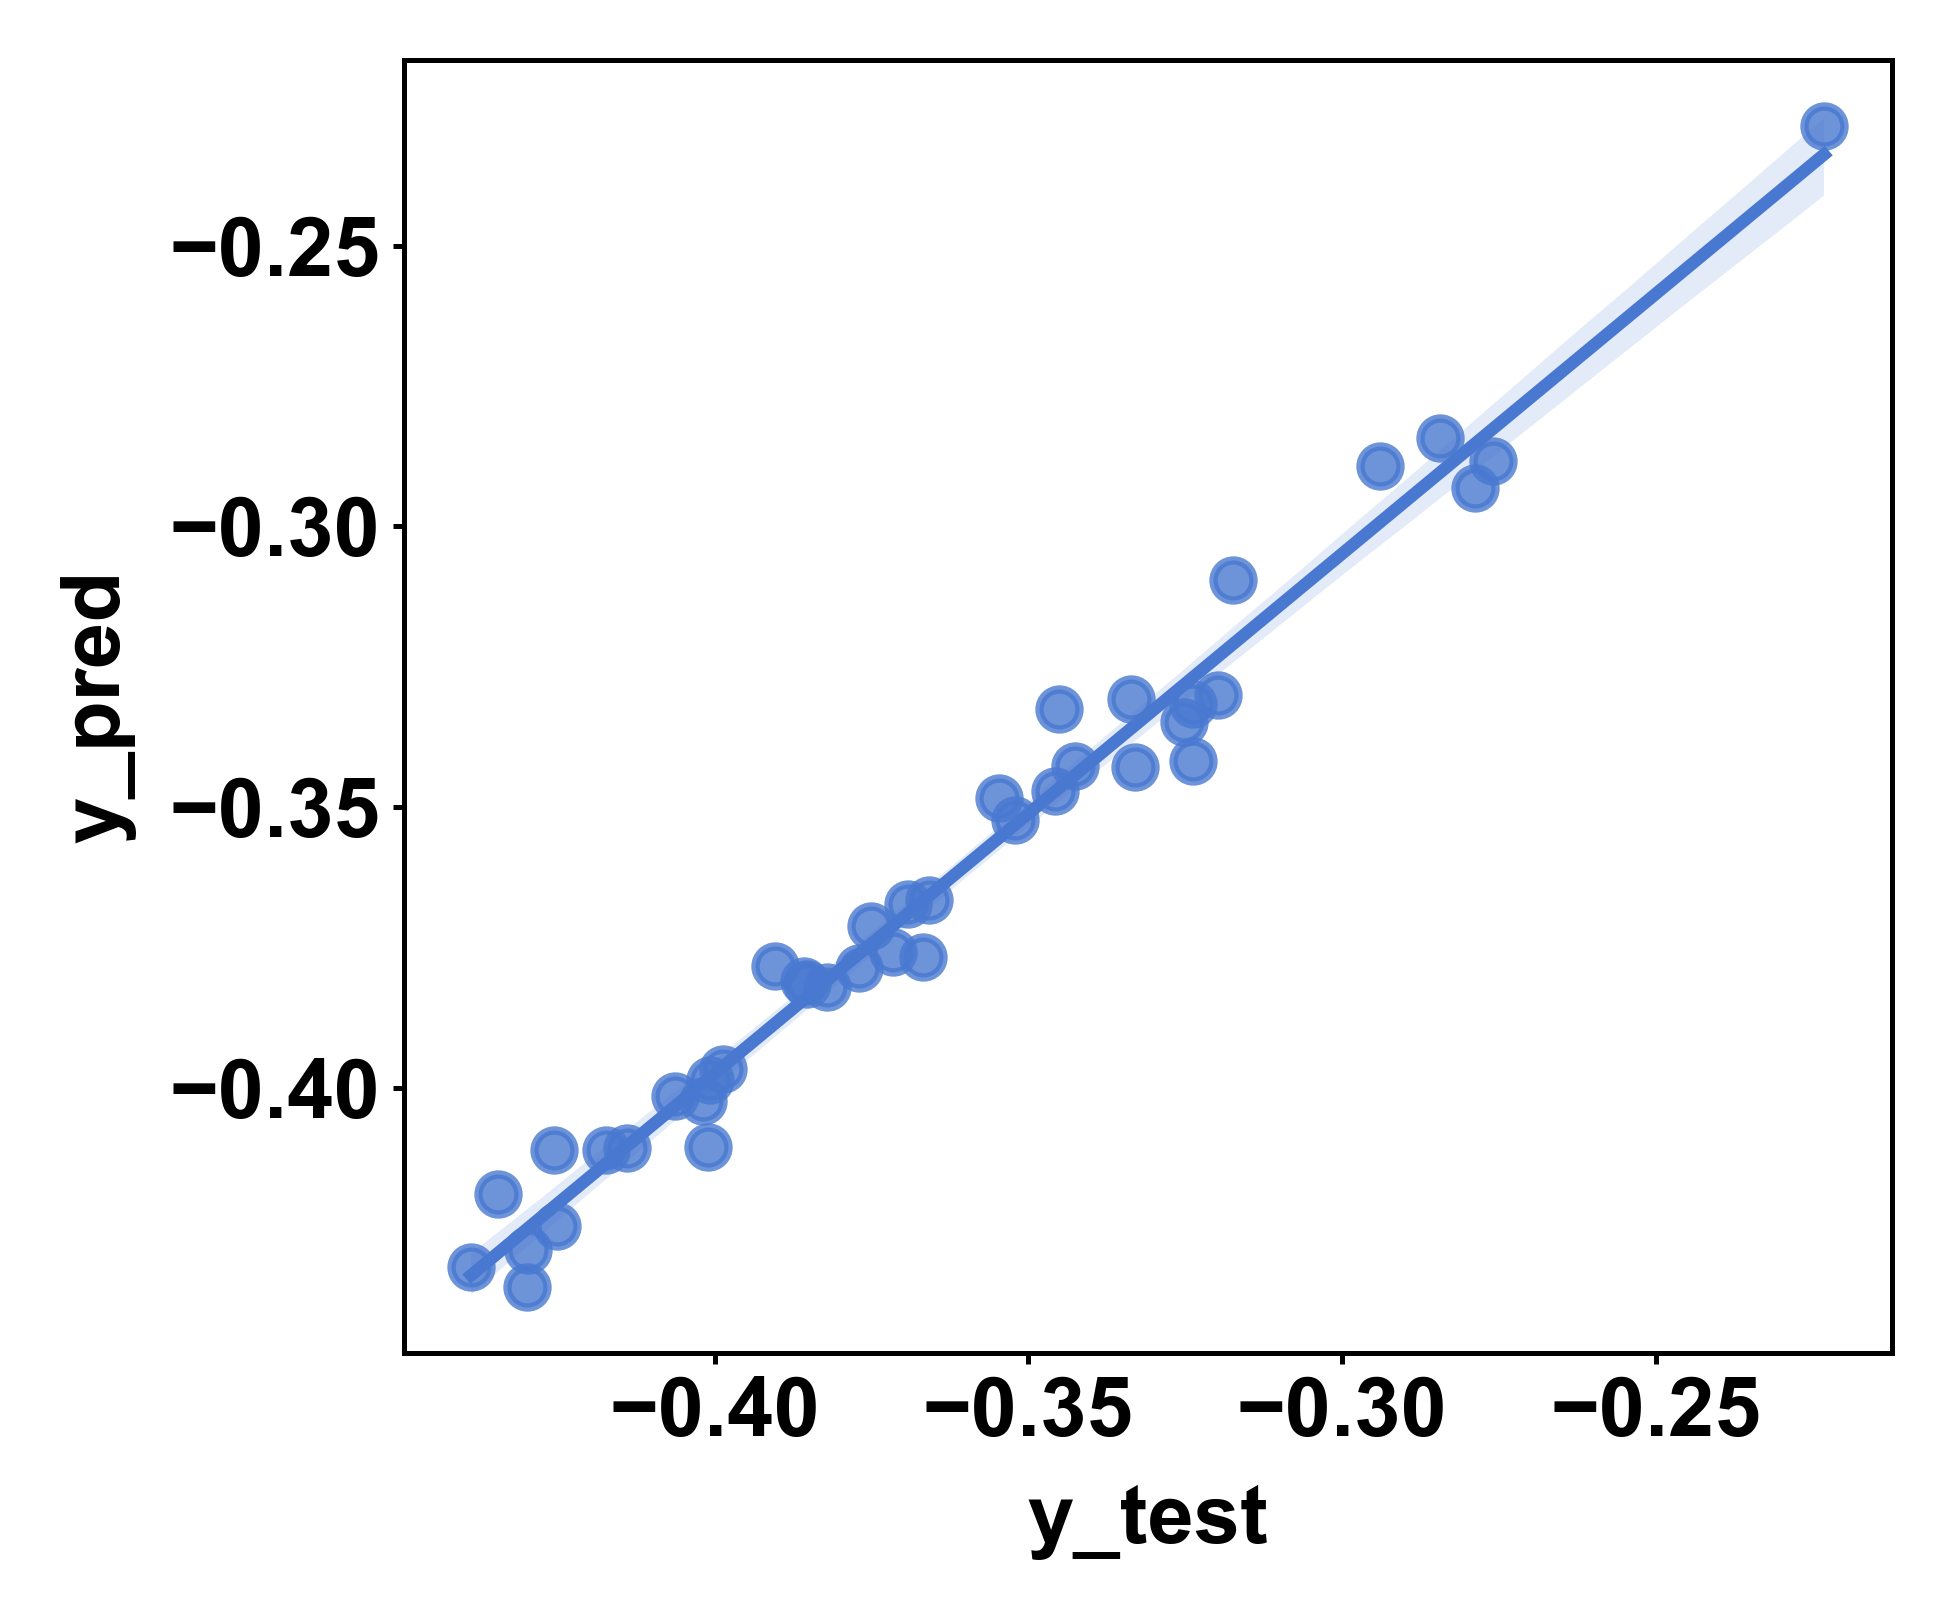

In [8]:
from sklearn.linear_model import Ridge
Ridge_default = Ridge()
Ridge_default.fit(X_train_standard_np,y_train_np)
y_pred_default=Ridge_default.predict(X_test_standard_np)


x_1,y_1=pd.Series(y_test_np,name='y_test'),pd.Series(y_pred_default,name='y_pred')
sns.regplot(x=x_1,y=y_1)
plt.show


#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_test_np,y_pred_default))
r2 = r2_score(y_test_np,y_pred_default)


print(f'Mean Absolute Error MAE: {mean_absolute_error(y_test_np,y_pred_default)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [9]:
x=1.0

In [10]:

data = pd.read_excel('data_final.xlsx')


#data = data.astype(float)
#data.info()


X_all = data.drop(['S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E','Formation_Energy'], axis=1)
X_all_colums=X_all.columns
y_all = data.iloc[:,0]


X_all_np=X_all.values
y_all_np=y_all.values

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
RI_all = Ridge(alpha=x)


feature_imp_set=[]
feature_imp_set_noabs=[]


train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []

test_rmse_scores = []
test_r2_scores = []
test_mae_scores = []

final_test_rmse_scores = []
final_test_r2_scores = []
final_test_mae_scores = []


n = 20


for i in range(n):
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=True, random_state=i)

    scaler_all.fit(X_all_train)
    X_all_train_standard = scaler_all.transform(X_all_train)
    X_all_test_standard = scaler_all.transform(X_all_test)
    X_final_test_standard_all = scaler_all.transform(X_final_test)
    
    RI_all.fit(X_all_train_standard, y_all_train)

    y_all_train_pred = RI_all.predict(X_all_train_standard)
    train_rmse = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
    train_rmse_scores.append(train_rmse)
    train_r2 = r2_score(y_all_train, y_all_train_pred)
    train_r2_scores.append(train_r2)
    train_mae = mean_absolute_error(y_all_train, y_all_train_pred)
    train_mae_scores.append(train_mae)

    y_all_test_pred = RI_all.predict(X_all_test_standard)
    test_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
    test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_all_test, y_all_test_pred)
    test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_all_test, y_all_test_pred)
    test_mae_scores.append(test_mae)

    y_final_test_pred_all = RI_all.predict(X_final_test_standard_all)
    test_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred_all))
    final_test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_final_test_np, y_final_test_pred_all)
    final_test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_final_test_np, y_final_test_pred_all)
    final_test_mae_scores.append(test_mae)

    feature_imp=RI_all.coef_
    feature_imp_abs=np.abs(feature_imp)
    feature_imp_set_noabs.append(feature_imp)
    feature_imp_set.append(feature_imp_abs)



results_dict = {
    'method': ['RI'] * (3 * n),
    'set_type': ['Train'] * n + ['Test'] * n + ['Final_Test'] * n,
    'MAE': train_mae_scores + test_mae_scores + final_test_mae_scores,
    'RMSE': train_rmse_scores + test_rmse_scores + final_test_rmse_scores,
    'R2': train_r2_scores + test_r2_scores + final_test_r2_scores
}
results_df = pd.DataFrame(results_dict)

excel_filename = 'model_evaluation_results_all.xlsx'
results_df.to_excel(excel_filename, index=False)

In [12]:
#打印评估结果
print('train set:')
print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

print('\ntest set:')
print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

print('\nindependent test set:')
print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')

print(f'\nResults have been saved to {excel_filename}')


print('\nDataFrame preview:')
print(results_df.head())



print('best test set')
min_mae = min(test_mae_scores)
min_mae_index = test_mae_scores.index(min_mae)
print('min MAE score:', min_mae, '    ', 'random_state=', min_mae_index)

min_rmse = min(test_rmse_scores)
min_rmse_index = test_rmse_scores.index(min_rmse)
print('min RMSE score:', min_rmse, '    ', 'random_state=', min_rmse_index)

max_r2 = max(test_r2_scores)
max_r2_index = test_r2_scores.index(max_r2)
print('max R2 score:', max_r2, '    ', 'random_state=', max_r2_index)

print('independent test set')
final_min_mae = min(final_test_mae_scores)
final_min_mae_index = final_test_mae_scores.index(final_min_mae)
print('min MAE score:', final_min_mae, '    ', 'random_state=', final_min_mae_index)

final_min_rmse = min(final_test_rmse_scores)
final_min_rmse_index = final_test_rmse_scores.index(final_min_rmse)
print('min RMSE score:', final_min_rmse, '    ', 'random_state=', final_min_rmse_index)

final_max_r2 = max(final_test_r2_scores)
final_max_r2_index = final_test_r2_scores.index(final_max_r2)
print('max R2 score:', final_max_r2, '    ', 'random_state=', final_max_r2_index)

train set:
Average MAE score: 0.0056 ± 0.0001
Average RMSE score: 0.0070 ± 0.0001
Average R2 score: 0.9701 ± 0.0018

test set:
Average MAE score: 0.0057 ± 0.0006
Average RMSE score: 0.0071 ± 0.0005
Average R2 score: 0.9696 ± 0.0074

independent test set:
Average MAE score: 0.0056 ± 0.0001
Average RMSE score: 0.0073 ± 0.0000
Average R2 score: 0.9237 ± 0.0009

Results have been saved to model_evaluation_results_all.xlsx

DataFrame preview:
  method set_type       MAE      RMSE        R2
0     RI    Train  0.005657  0.006970  0.969526
1     RI    Train  0.005637  0.006859  0.967524
2     RI    Train  0.005855  0.007052  0.968758
3     RI    Train  0.005560  0.006935  0.969817
4     RI    Train  0.005684  0.007021  0.968118
best test set
min MAE score: 0.00473306503369134      random_state= 2
min RMSE score: 0.006501525282405035      random_state= 18
max R2 score: 0.9799627724135402      random_state= 18
independent test set
min MAE score: 0.005508406372206233      random_state= 2
min RMSE

train Mean Absolute Error MAE: 0.005855024281188566
train rmse scores :  0.007051993518946113
train R2 scores :  0.9687577869855102


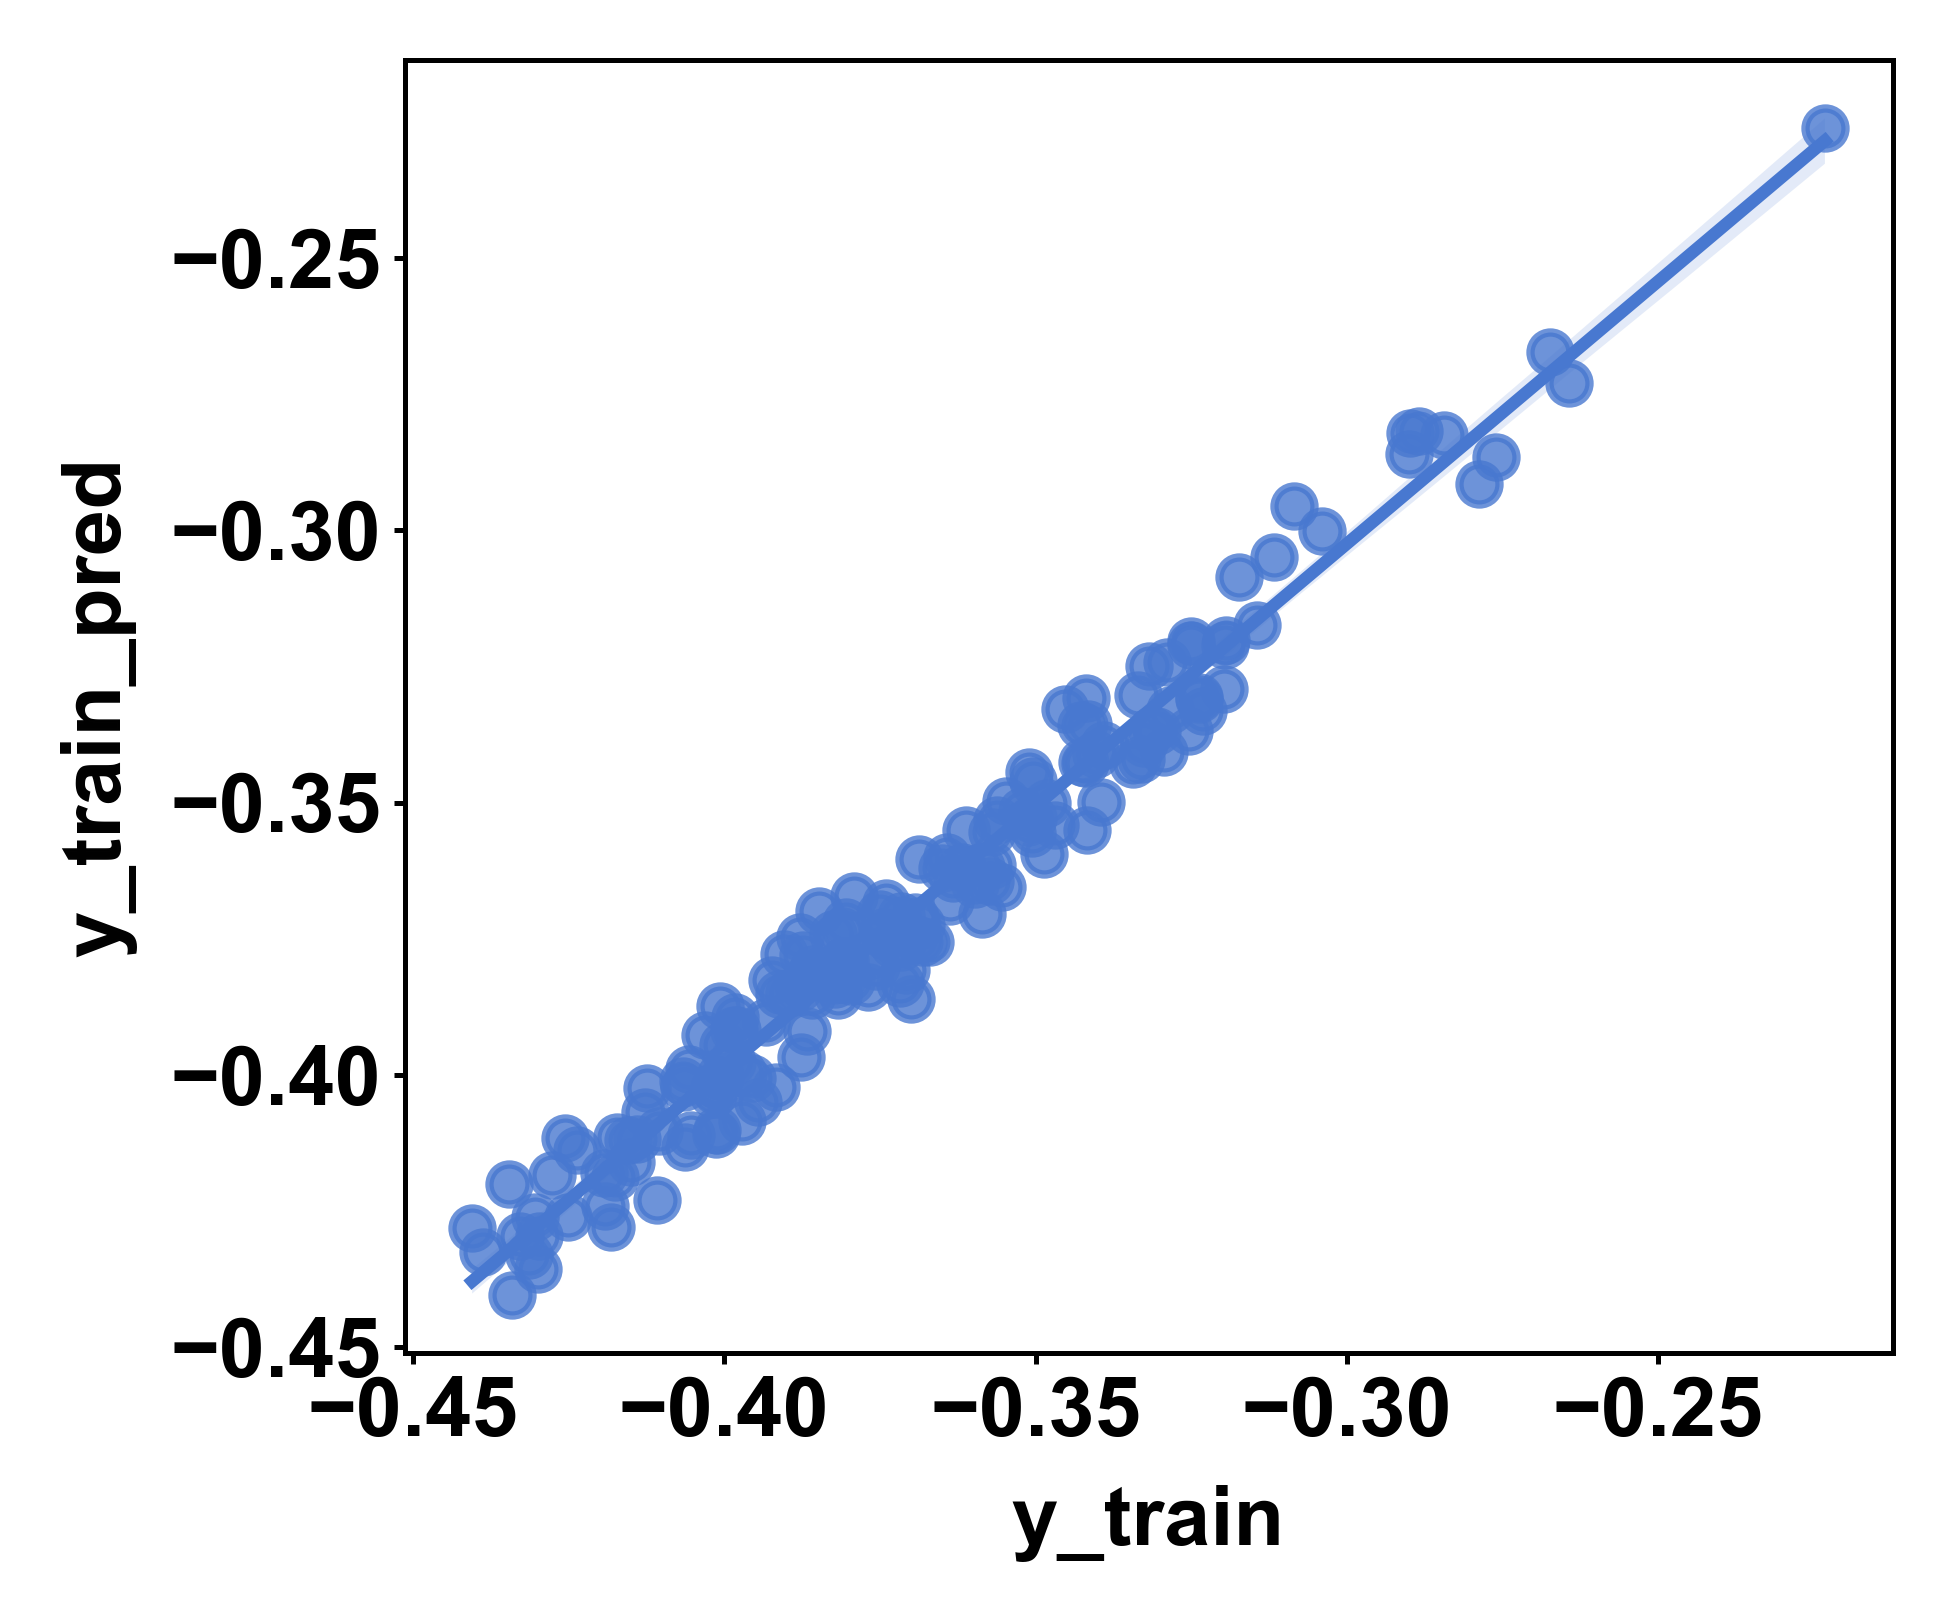

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_index=final_max_r2_index

X_train_best,X_test_best,y_train_best,y_test_best = train_test_split(X_all,y_all,test_size=0.2,shuffle=True,random_state=max_index) 



scaler_best = StandardScaler()
scaler_best.fit(X_train_best)
X_train_best_standard = scaler_best.transform(X_train_best)
X_test_best_standard = scaler_best.transform(X_test_best)
X_final_test_standard_best = scaler_best.transform(X_final_test)


RI_best = Ridge(alpha=x)
RI_best.fit(X_train_best_standard, y_train_best)
y_train_best_pred=RI_best.predict(X_train_best_standard)

x_best_1,y_best_1=pd.Series(y_train_best,name='y_train'),pd.Series(y_train_best_pred,name='y_train_pred')
sns.regplot(x=x_best_1,y=y_best_1)
plt.show

#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_train_best, y_train_best_pred))
r2 = r2_score(y_train_best, y_train_best_pred)


print(f'train Mean Absolute Error MAE: {mean_absolute_error(y_train_best,y_train_best_pred)}')
print ('train rmse scores : ',rmse)
print ('train R2 scores : ',r2)

test Mean Absolute Error MAE: 0.00473306503369134
test rmse scores :  0.006765692705156783
test R2 scores :  0.9759934669119984


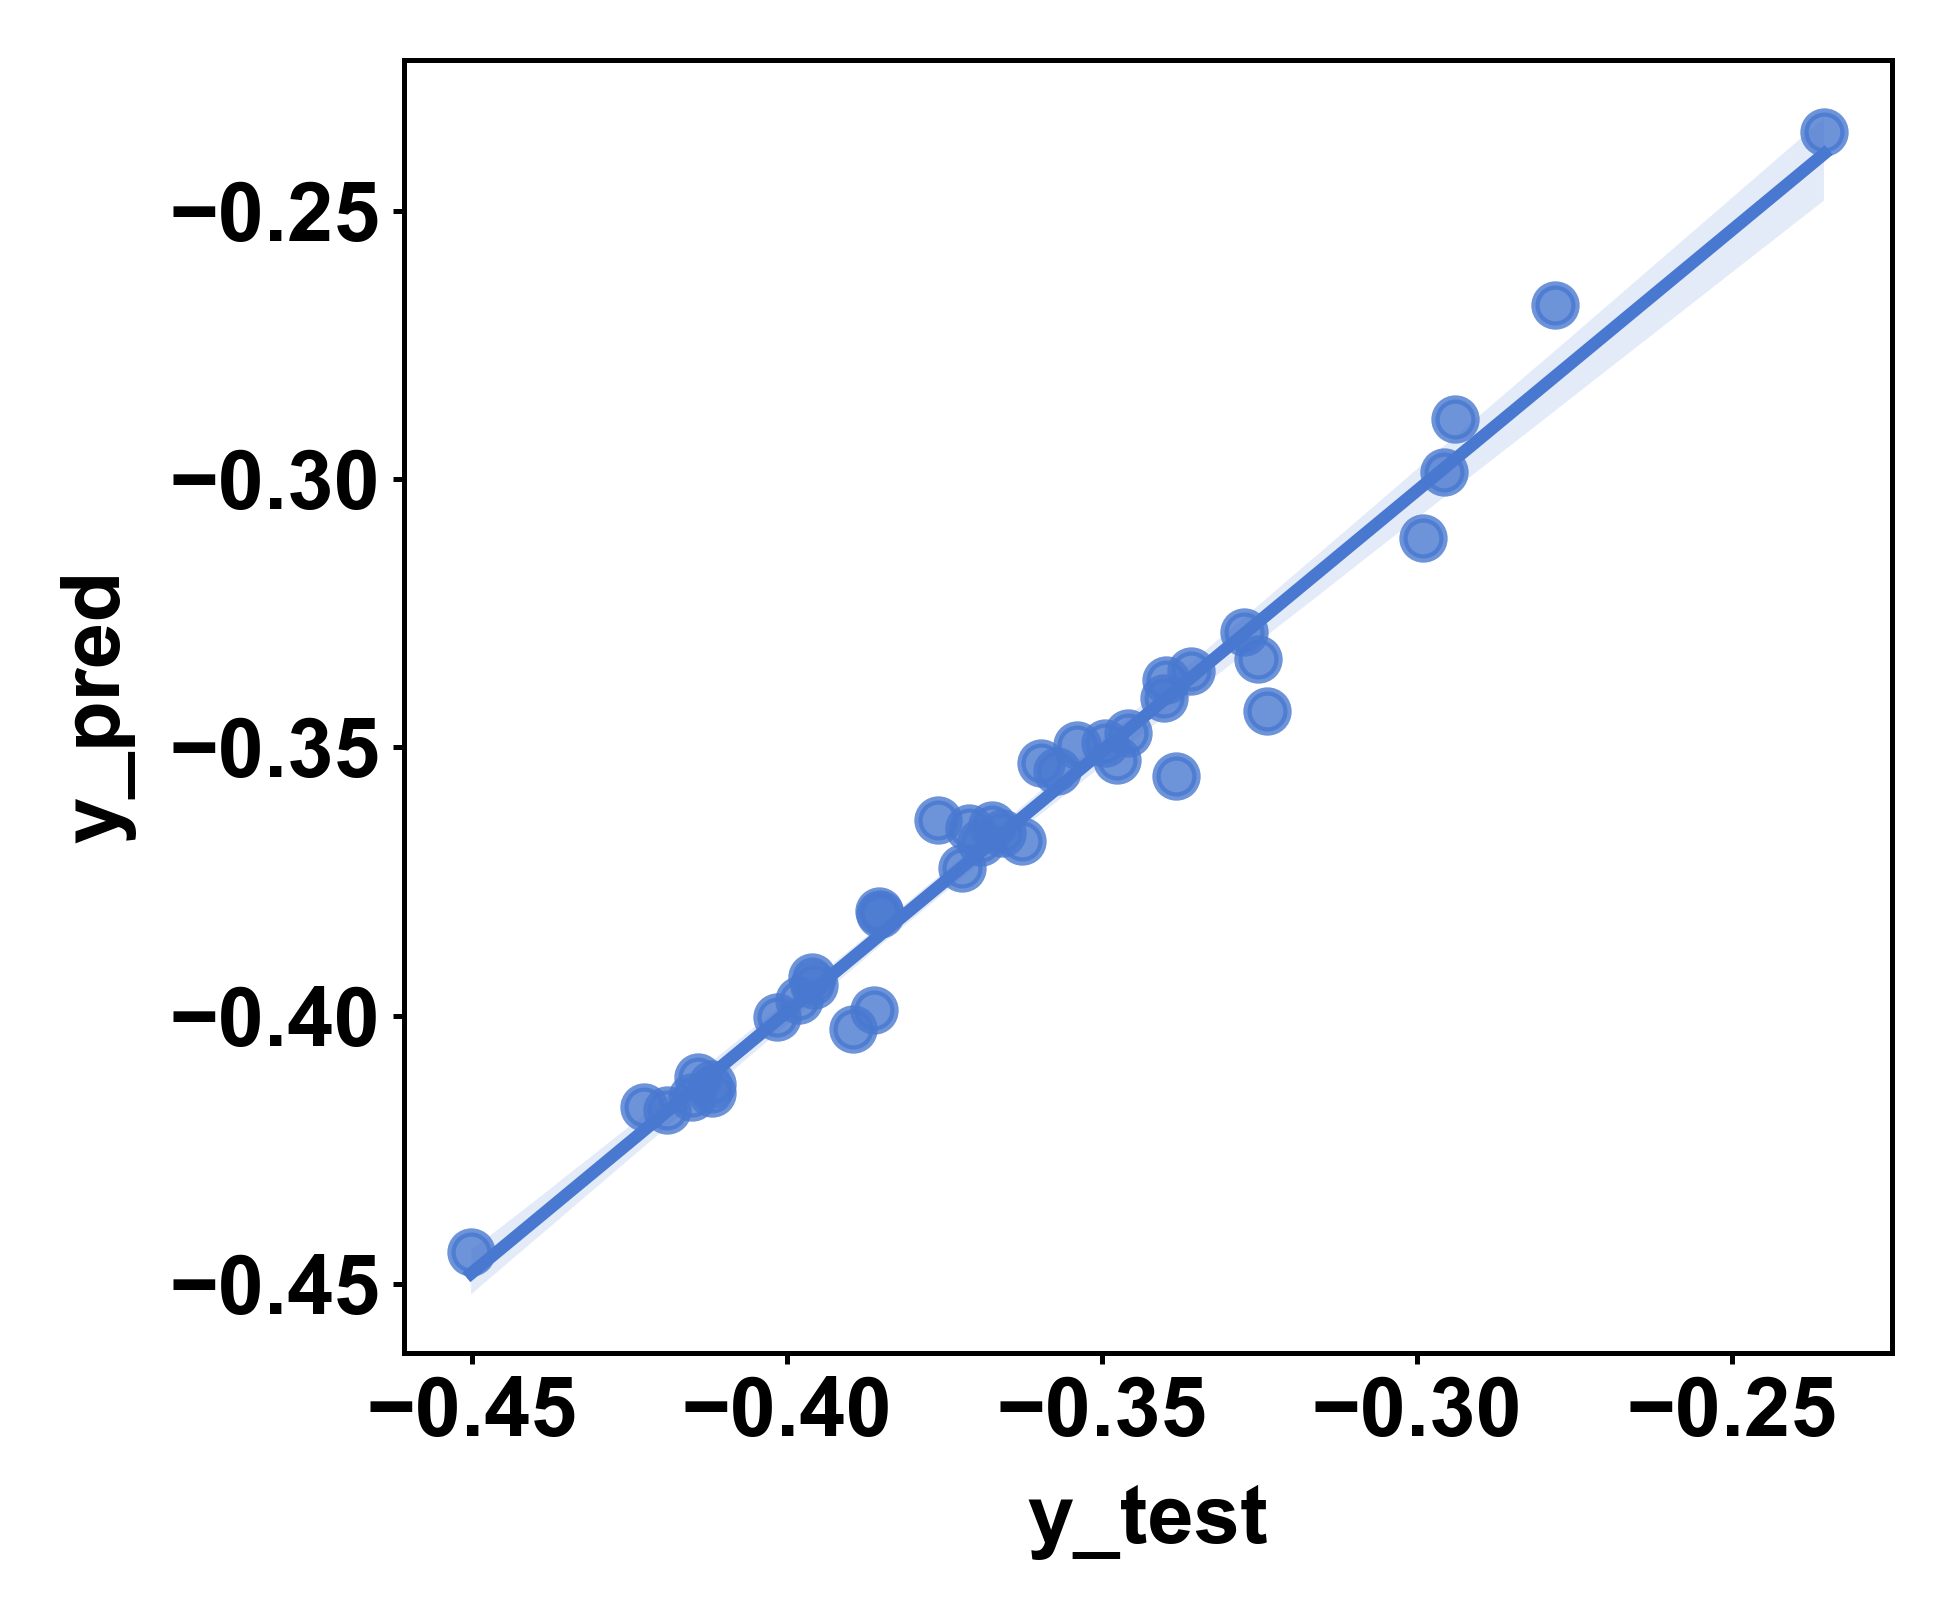

In [14]:

y_test_best_pred=RI_best.predict(X_test_best_standard)


x_best_2,y_best_2=pd.Series(y_test_best,name='y_test'),pd.Series(y_test_best_pred,name='y_pred')
sns.regplot(x=x_best_2,y=y_best_2)
plt.show

rmse = np.sqrt(mean_squared_error(y_test_best,y_test_best_pred))
r2 = r2_score(y_test_best,y_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_test_best,y_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

test Mean Absolute Error MAE: 0.005508406372206233
test rmse scores :  0.007216662490532854
test R2 scores :  0.9251117417545235


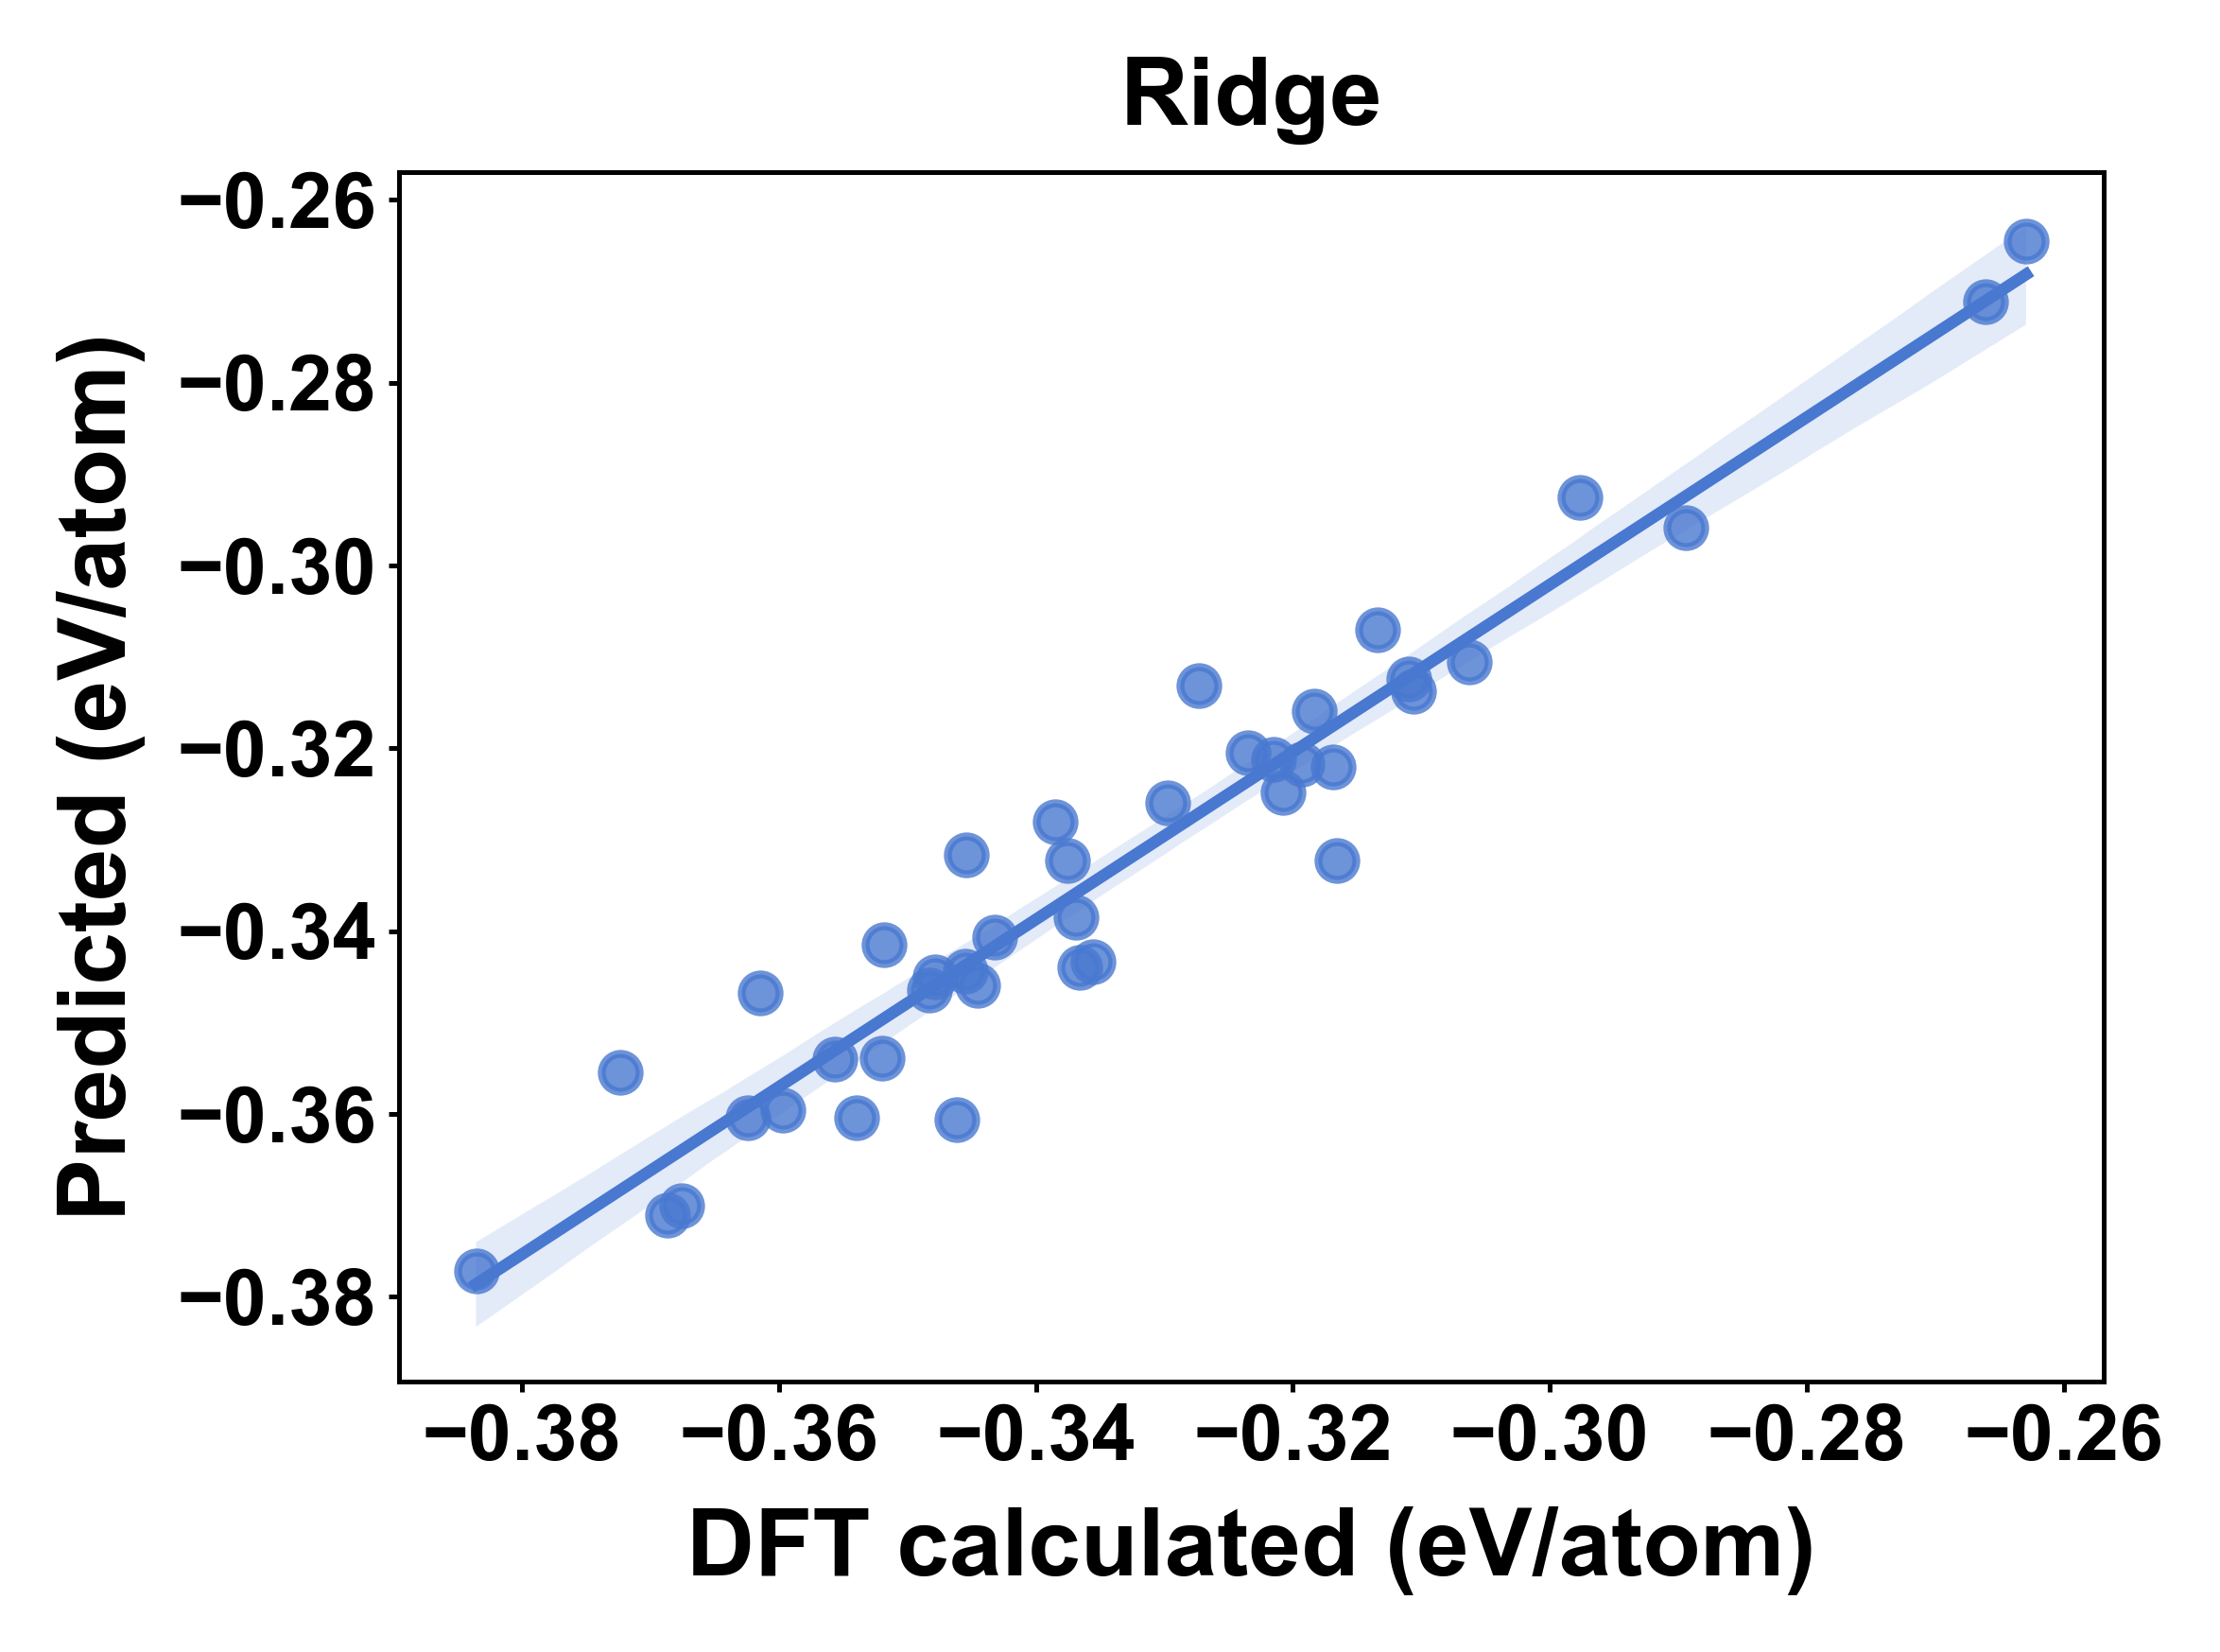

In [15]:

y_final_test_best_pred=RI_best.predict(X_final_test_standard_best)


x_best_3,y_best_3=pd.Series(y_final_test_np,name='DFT calculated (eV)'),pd.Series(y_final_test_best_pred,name='Predicted (eV)')
plt.figure(figsize=(4, 3))
sns.regplot(x=x_best_3, y=y_best_3)


plt.xlabel("DFT calculated (eV/atom)", fontsize=12)
plt.ylabel("Predicted (eV/atom)", fontsize=12)
plt.title('Ridge', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
#plt.savefig('validation.tif')
#plt.savefig('validation.pdf')

rmse = np.sqrt(mean_squared_error(y_final_test_np,y_final_test_best_pred))
r2 = r2_score(y_final_test_np,y_final_test_best_pred)
print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_final_test_np,y_final_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

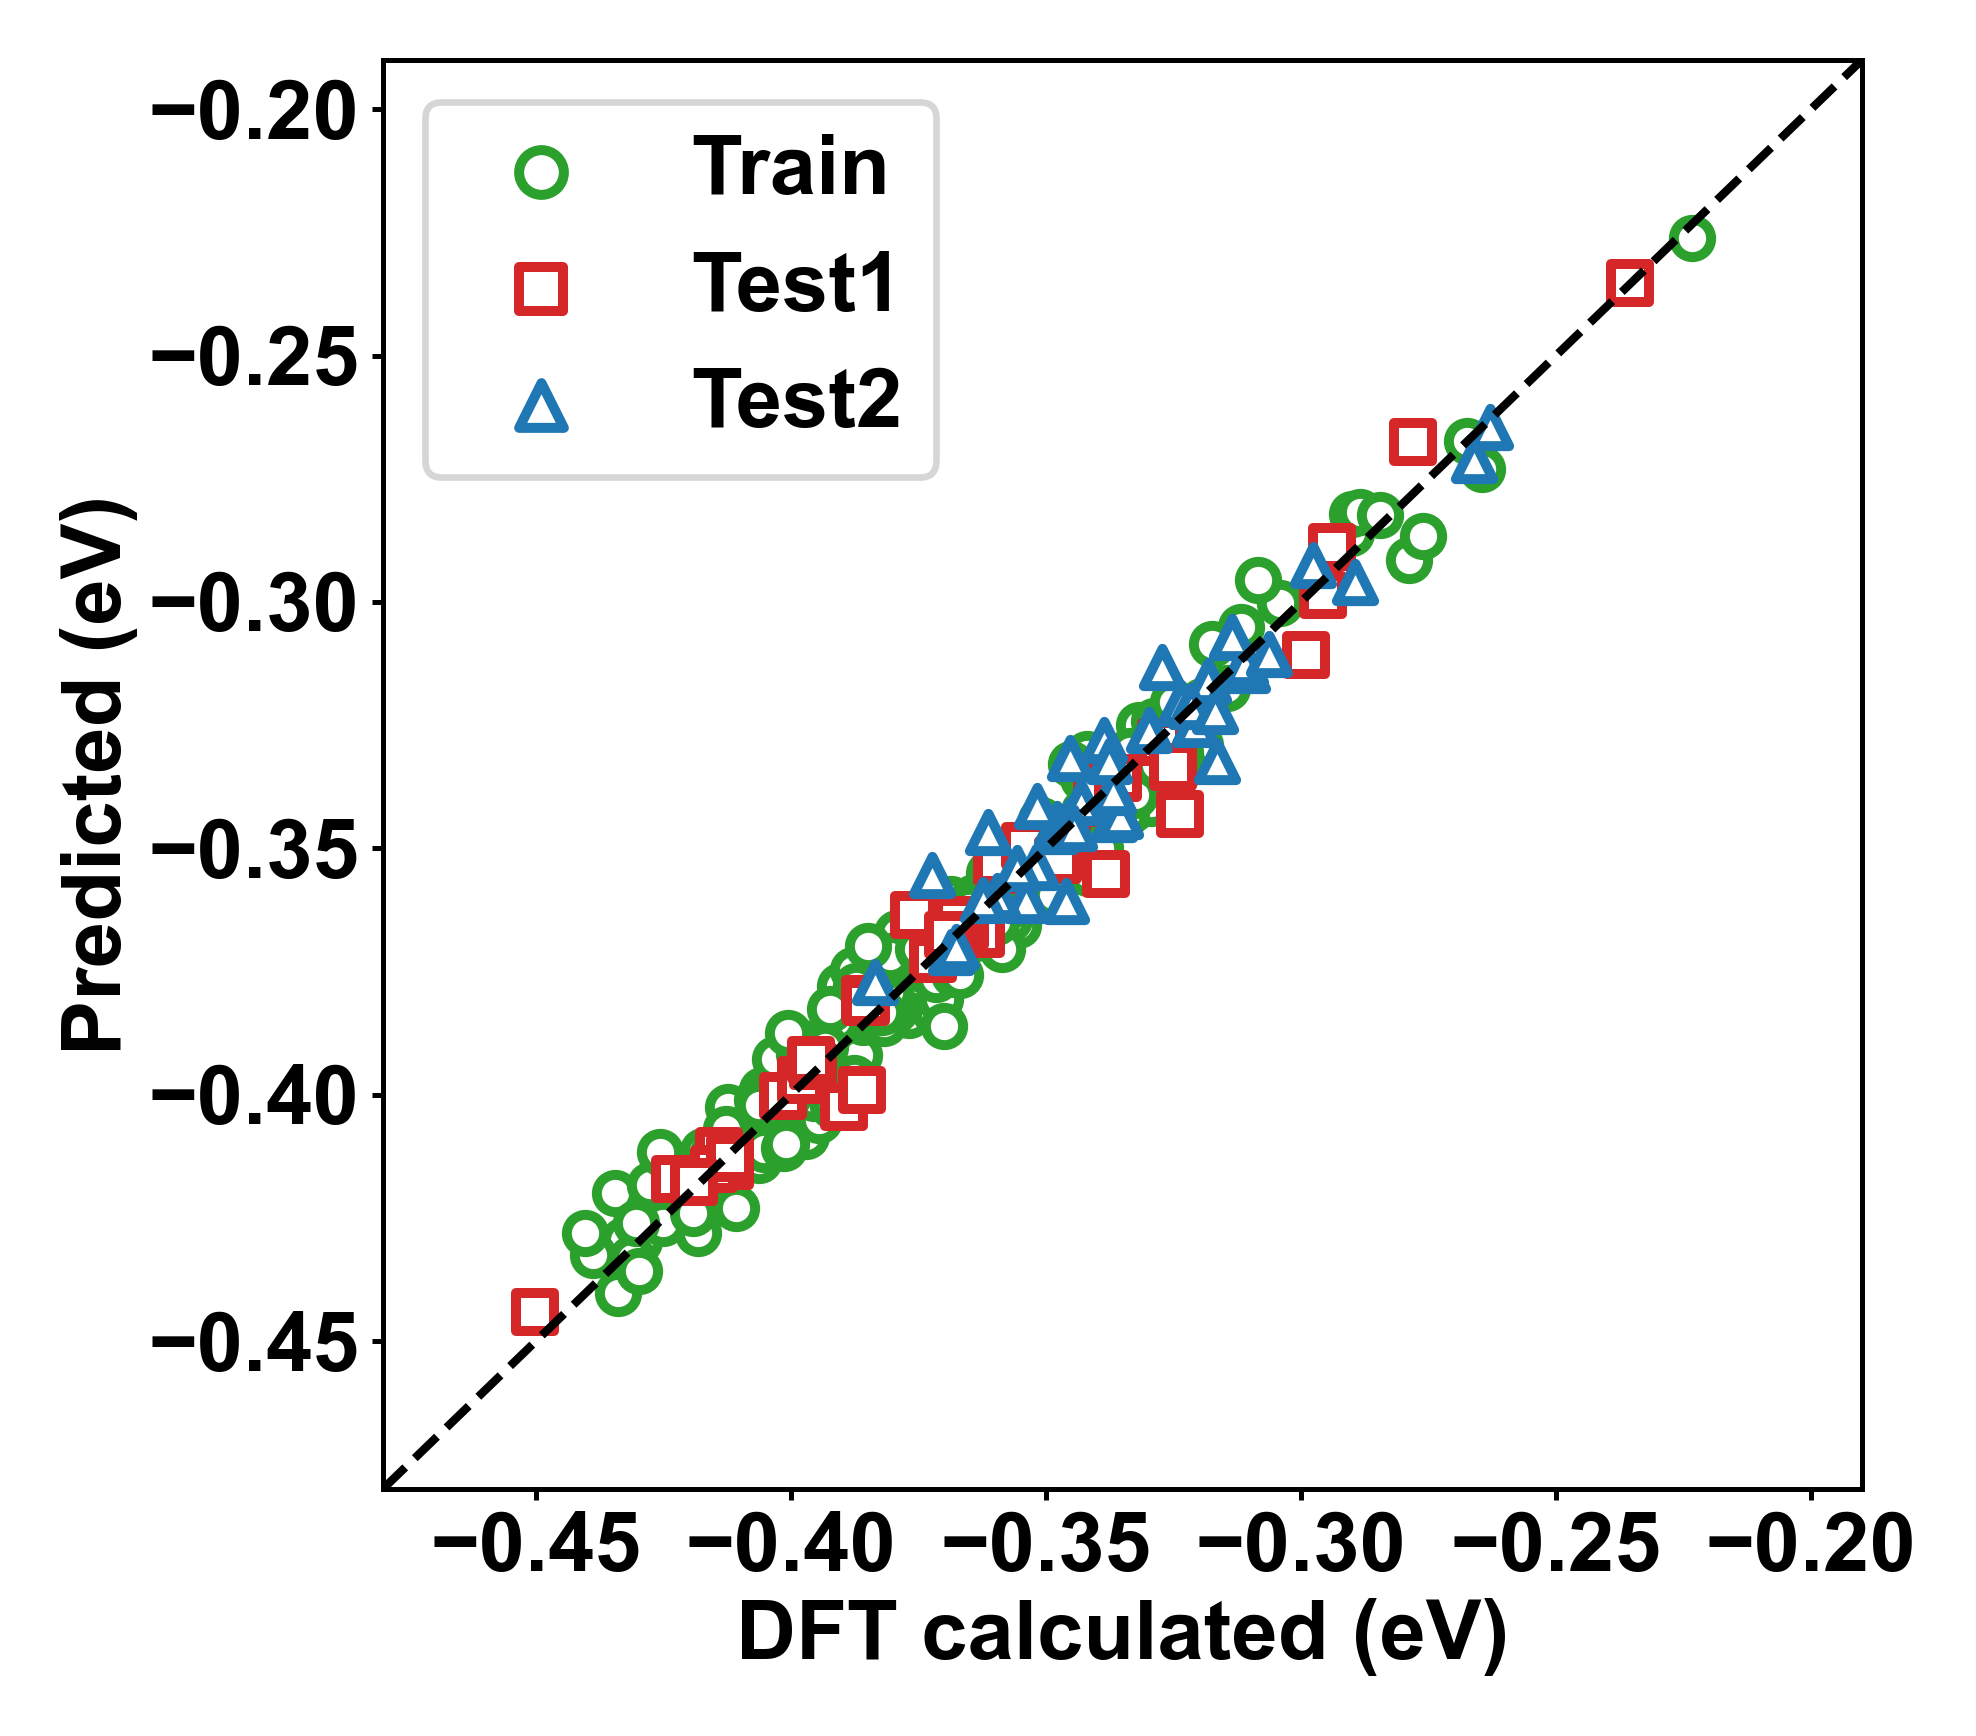

In [16]:
fig = plt.figure()
ax=fig.add_subplot(111)

ax.scatter(x_best_1,y_best_1,s=20,marker='o', color='w',  edgecolors='tab:green',linewidths=1.2, label = 'Train') 
ax.scatter(x_best_2,y_best_2,s=20,marker='s', color='w', edgecolors='tab:red',linewidths=1.2, label = 'Test1')
ax.scatter(x_best_3,y_best_3,s=20,marker='^', color='w', edgecolors='tab:blue',linewidths=1.2, label = 'Test2')


x_r=[-0.48, -0.19]
y_r=[-0.48, -0.19]
ax.plot(x_r,y_r,'k--')


ax.legend(loc='upper left',
          markerscale=1.2,)


ax.set_xlabel('DFT calculated (eV)',labelpad = 1.3)
ax.set_ylabel('Predicted (eV)',labelpad = 1.3)


ax.set_xlim([-0.48,-0.19])  
ax.set_ylim([-0.48,-0.19])


xmajorLocator   = MultipleLocator(0.05) 
ax.xaxis.set_major_locator(xmajorLocator)

ymajorLocator   = MultipleLocator(0.05) 
ax.yaxis.set_major_locator(ymajorLocator)


#fig.tight_layout()
fig.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

#plt.savefig('Ridge_best_all.pdf')
plt.show()

In [17]:

data_predict = pd.read_excel('predict_input.xlsx')
X_predict = data_predict.iloc[:,6:20]
X_predict = X_predict.drop(['S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E'], axis=1)
X_predict = X_predict.drop(['VEC'], axis=1)
X_predict_col = X_predict.columns
X_predict_np = X_predict.values


X_predict_standard =scaler_best.transform(X_predict)
y_predict_pred=RI_best.predict(X_predict_standard)


y_predict_pred = y_predict_pred.reshape(-1, 1)
final_predict_data =  np.concatenate((y_predict_pred, X_predict_np), axis=1)
predict_col=X_predict_col.insert(0, 'prediction')
prediction_pandas=pd.DataFrame(final_predict_data, columns=predict_col)
prediction_pandas

,prediction,Ru_P,Rh_P,Ir_P,AVE_E,AVE_M,MSD_R,H_MIX
0,-0.372023,0.055556,0.222222,0.055556,2.257778,132.424942,0.043271,-11.543210
1,-0.375317,0.055556,0.231481,0.055556,2.258889,132.489345,0.043771,-11.634774
2,-0.374671,0.055556,0.231481,0.055556,2.257037,131.675549,0.043673,-11.704733
3,-0.378418,0.055556,0.240741,0.055556,2.260000,132.553748,0.044250,-11.716049
4,-0.377796,0.055556,0.240741,0.055556,2.258148,131.739951,0.044150,-11.788066
...,...,...,...,...,...,...,...,...
548005,-0.246150,0.333333,0.203704,0.333333,2.224074,136.859100,0.029699,-6.440329
548006,-0.246078,0.333333,0.203704,0.333333,2.222222,136.045304,0.029350,-6.596708
548007,-0.238885,0.333333,0.212963,0.333333,2.225185,136.923503,0.029364,-5.922840
548008,-0.238819,0.333333,0.212963,0.333333,2.223333,136.109706,0.029005,-6.081276


In [18]:
with pd.ExcelWriter('predict_output_all.xlsx') as writer:
    prediction_pandas.to_excel(writer,index=False)

In [19]:
top10 = prediction_pandas.nlargest(10, 'prediction')


bottom10 = prediction_pandas.nsmallest(10, 'prediction')


combined = pd.concat([top10, bottom10])
combined

,prediction,Ru_P,Rh_P,Ir_P,AVE_E,AVE_M,MSD_R,H_MIX
326704,-0.220860,0.333333,0.333333,0.222222,2.233333,126.250608,0.030541,-4.938272
346544,-0.221748,0.333333,0.324074,0.231481,2.232593,127.077566,0.030409,-4.985940
366294,-0.222634,0.333333,0.314815,0.240741,2.231852,127.904525,0.030272,-5.034294
346079,-0.223287,0.324074,0.333333,0.231481,2.233333,127.094561,0.030551,-4.968793
385898,-0.223518,0.333333,0.305556,0.250000,2.231111,128.731483,0.030130,-5.083333
365859,-0.224167,0.324074,0.324074,0.240741,2.232593,127.921520,0.030418,-5.016118
405303,-0.224399,0.333333,0.296296,0.259259,2.230370,129.558441,0.029983,-5.133059
385492,-0.225046,0.324074,0.314815,0.250000,2.231852,128.748478,0.030280,-5.064129
424459,-0.225278,0.333333,0.287037,0.268519,2.229630,130.385400,0.029832,-5.183471
365394,-0.225703,0.314815,0.333333,0.240741,2.233333,127.938515,0.030561,-4.998628


In [20]:
with pd.ExcelWriter('predict_output_all_inde.xlsx') as writer:
    combined.to_excel(writer,index=False)

In [21]:
index_list = combined.index.tolist()
print(index_list)
with open ('predit_index_inde.dat', 'w') as file:
    file.write(str(index_list))

[326704, 346544, 366294, 346079, 385898, 365859, 405303, 385492, 424459, 365394, 531803, 531820, 531787, 531838, 531821, 531804, 531772, 531839, 531788, 531857]


test Mean Absolute Error MAE: 0.0036653848747406057
test rmse scores :  0.004733616436678127
test R2 scores :  0.9981545466856605


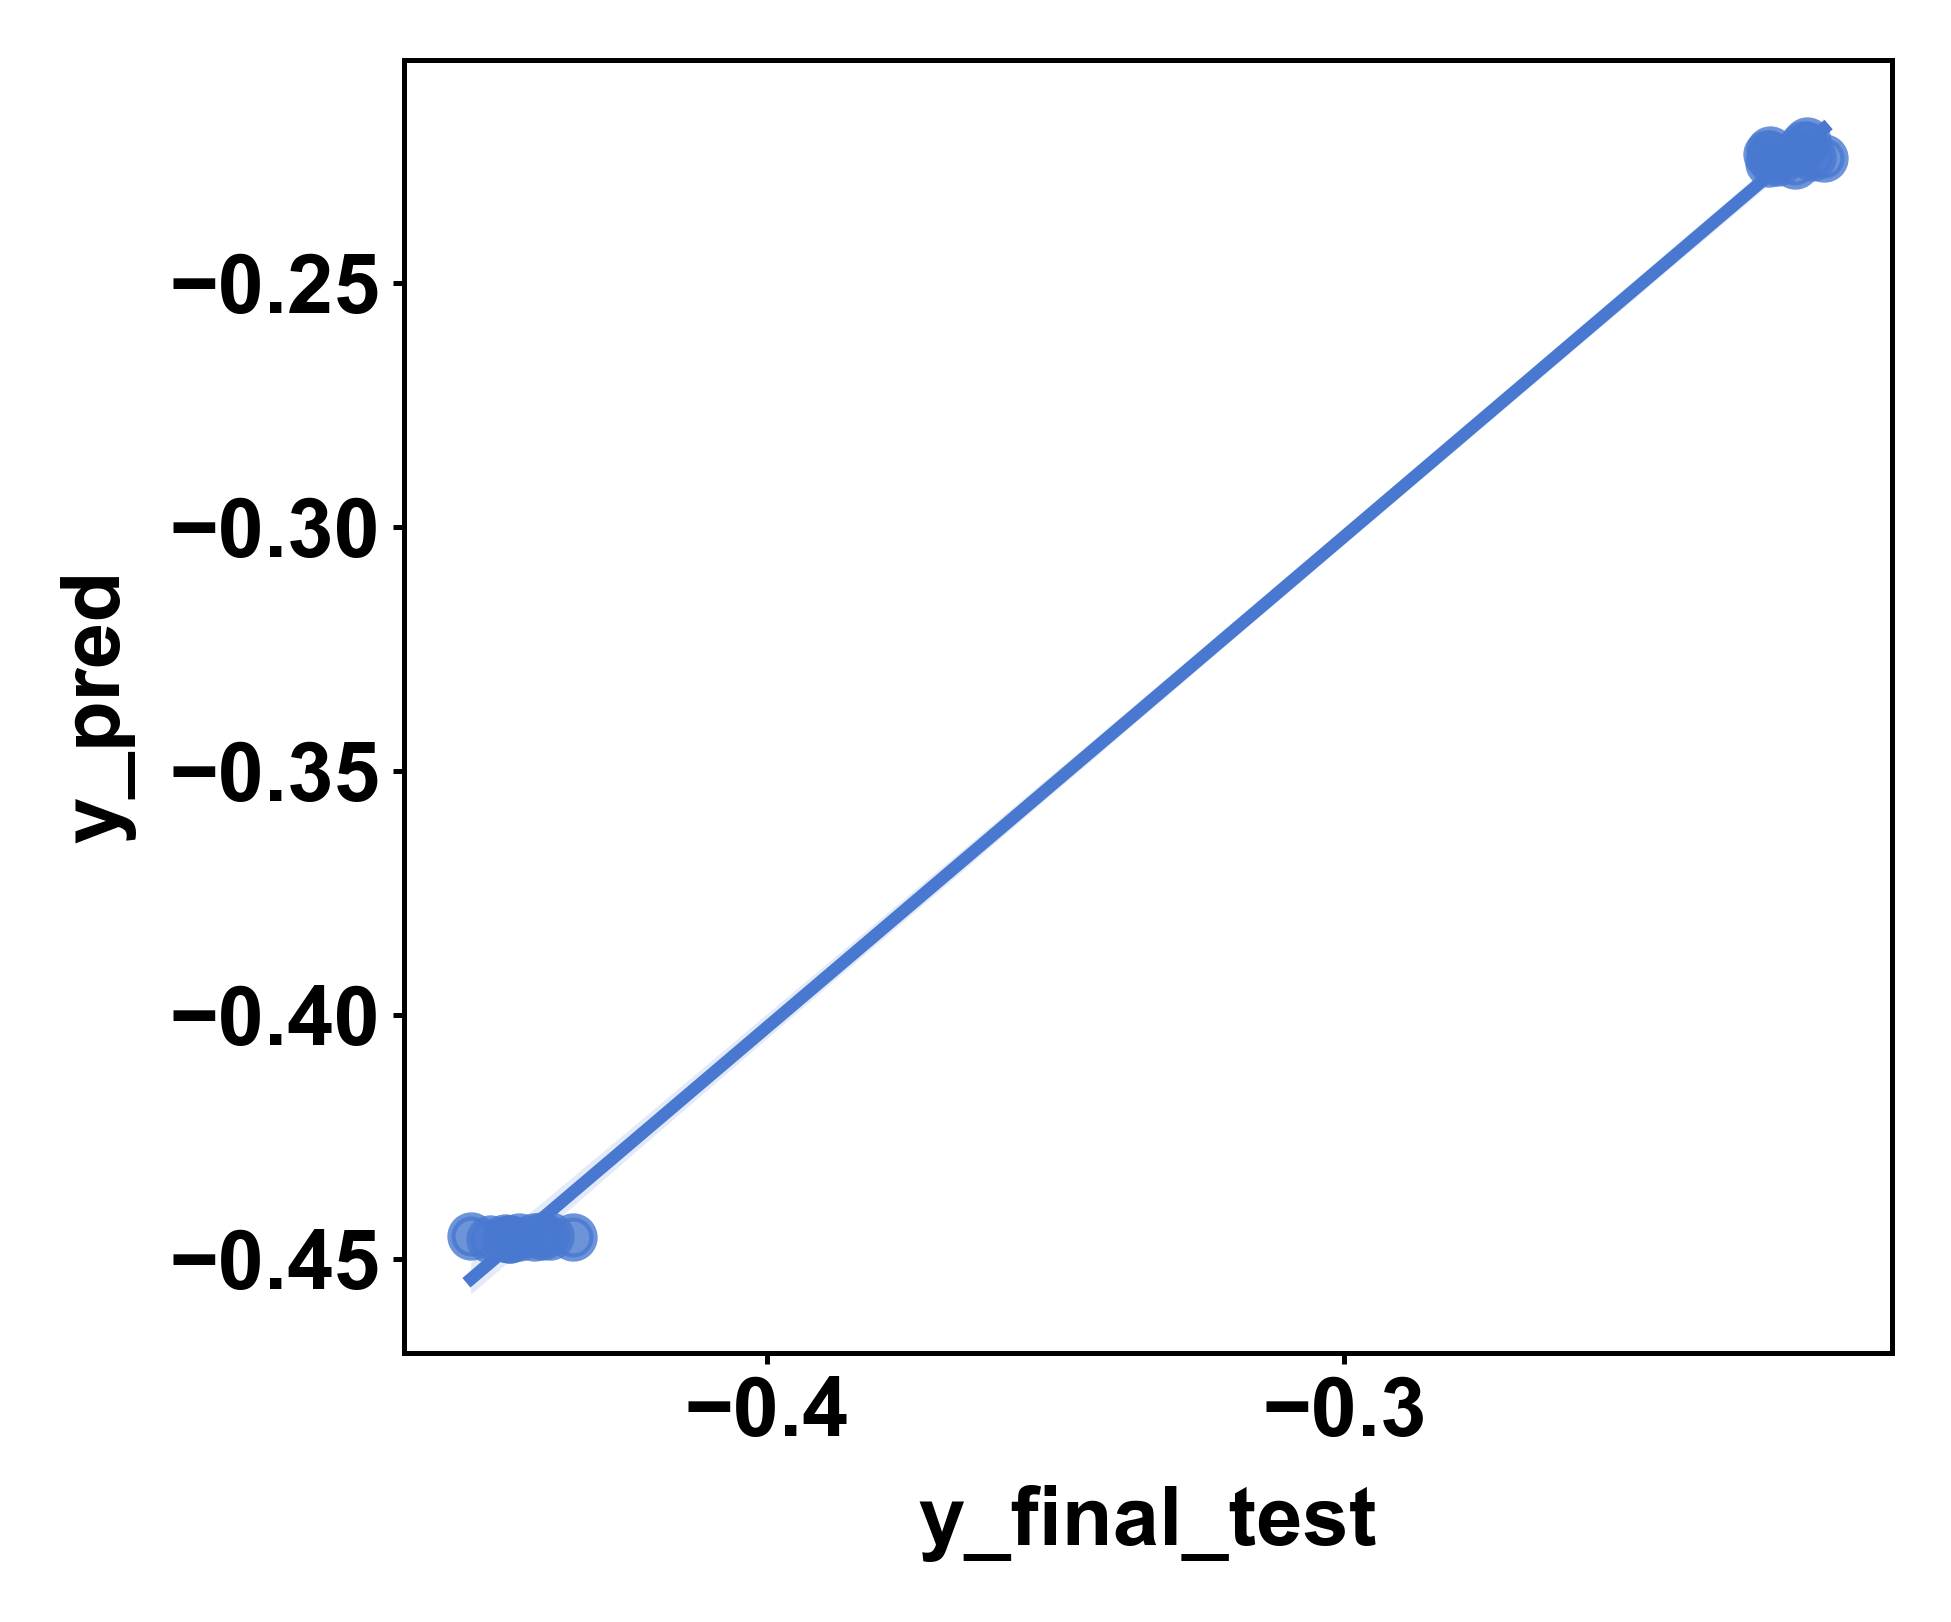

In [22]:
predict_calculate_data = pd.read_excel('predict_calculate_all_Ridge_inde.xlsx')

y_prdict = pd.DataFrame(predict_calculate_data)['predict']
x_calculate = pd.DataFrame(predict_calculate_data)['cal_atom']


x_calculate,y_prdict=pd.Series(x_calculate,name='y_final_test'),pd.Series(y_prdict,name='y_pred')
sns.regplot(x=x_calculate,y=y_prdict)
plt.show

rmse = np.sqrt(mean_squared_error(x_calculate,y_prdict))
r2 = r2_score(x_calculate,y_prdict)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(x_calculate,y_prdict)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [23]:
prediction_pandas_prediction = prediction_pandas.iloc[:,0]


X_prediction = data_predict.iloc[:,6:11]


same = X_prediction.index.equals(prediction_pandas_prediction.index)
print(same) 


final_original_all =  pd.concat((prediction_pandas_prediction, X_prediction), axis=1)
final_original_all

True


,prediction,Mo_P,Ru_P,Rh_P,W_P,Ir_P
0,-0.372023,0.333333,0.055556,0.222222,0.333333,0.055556
1,-0.375317,0.324074,0.055556,0.231481,0.333333,0.055556
2,-0.374671,0.333333,0.055556,0.231481,0.324074,0.055556
3,-0.378418,0.314815,0.055556,0.240741,0.333333,0.055556
4,-0.377796,0.324074,0.055556,0.240741,0.324074,0.055556
...,...,...,...,...,...,...
548005,-0.246150,0.064815,0.333333,0.203704,0.064815,0.333333
548006,-0.246078,0.074074,0.333333,0.203704,0.055556,0.333333
548007,-0.238885,0.055556,0.333333,0.212963,0.064815,0.333333
548008,-0.238819,0.064815,0.333333,0.212963,0.055556,0.333333


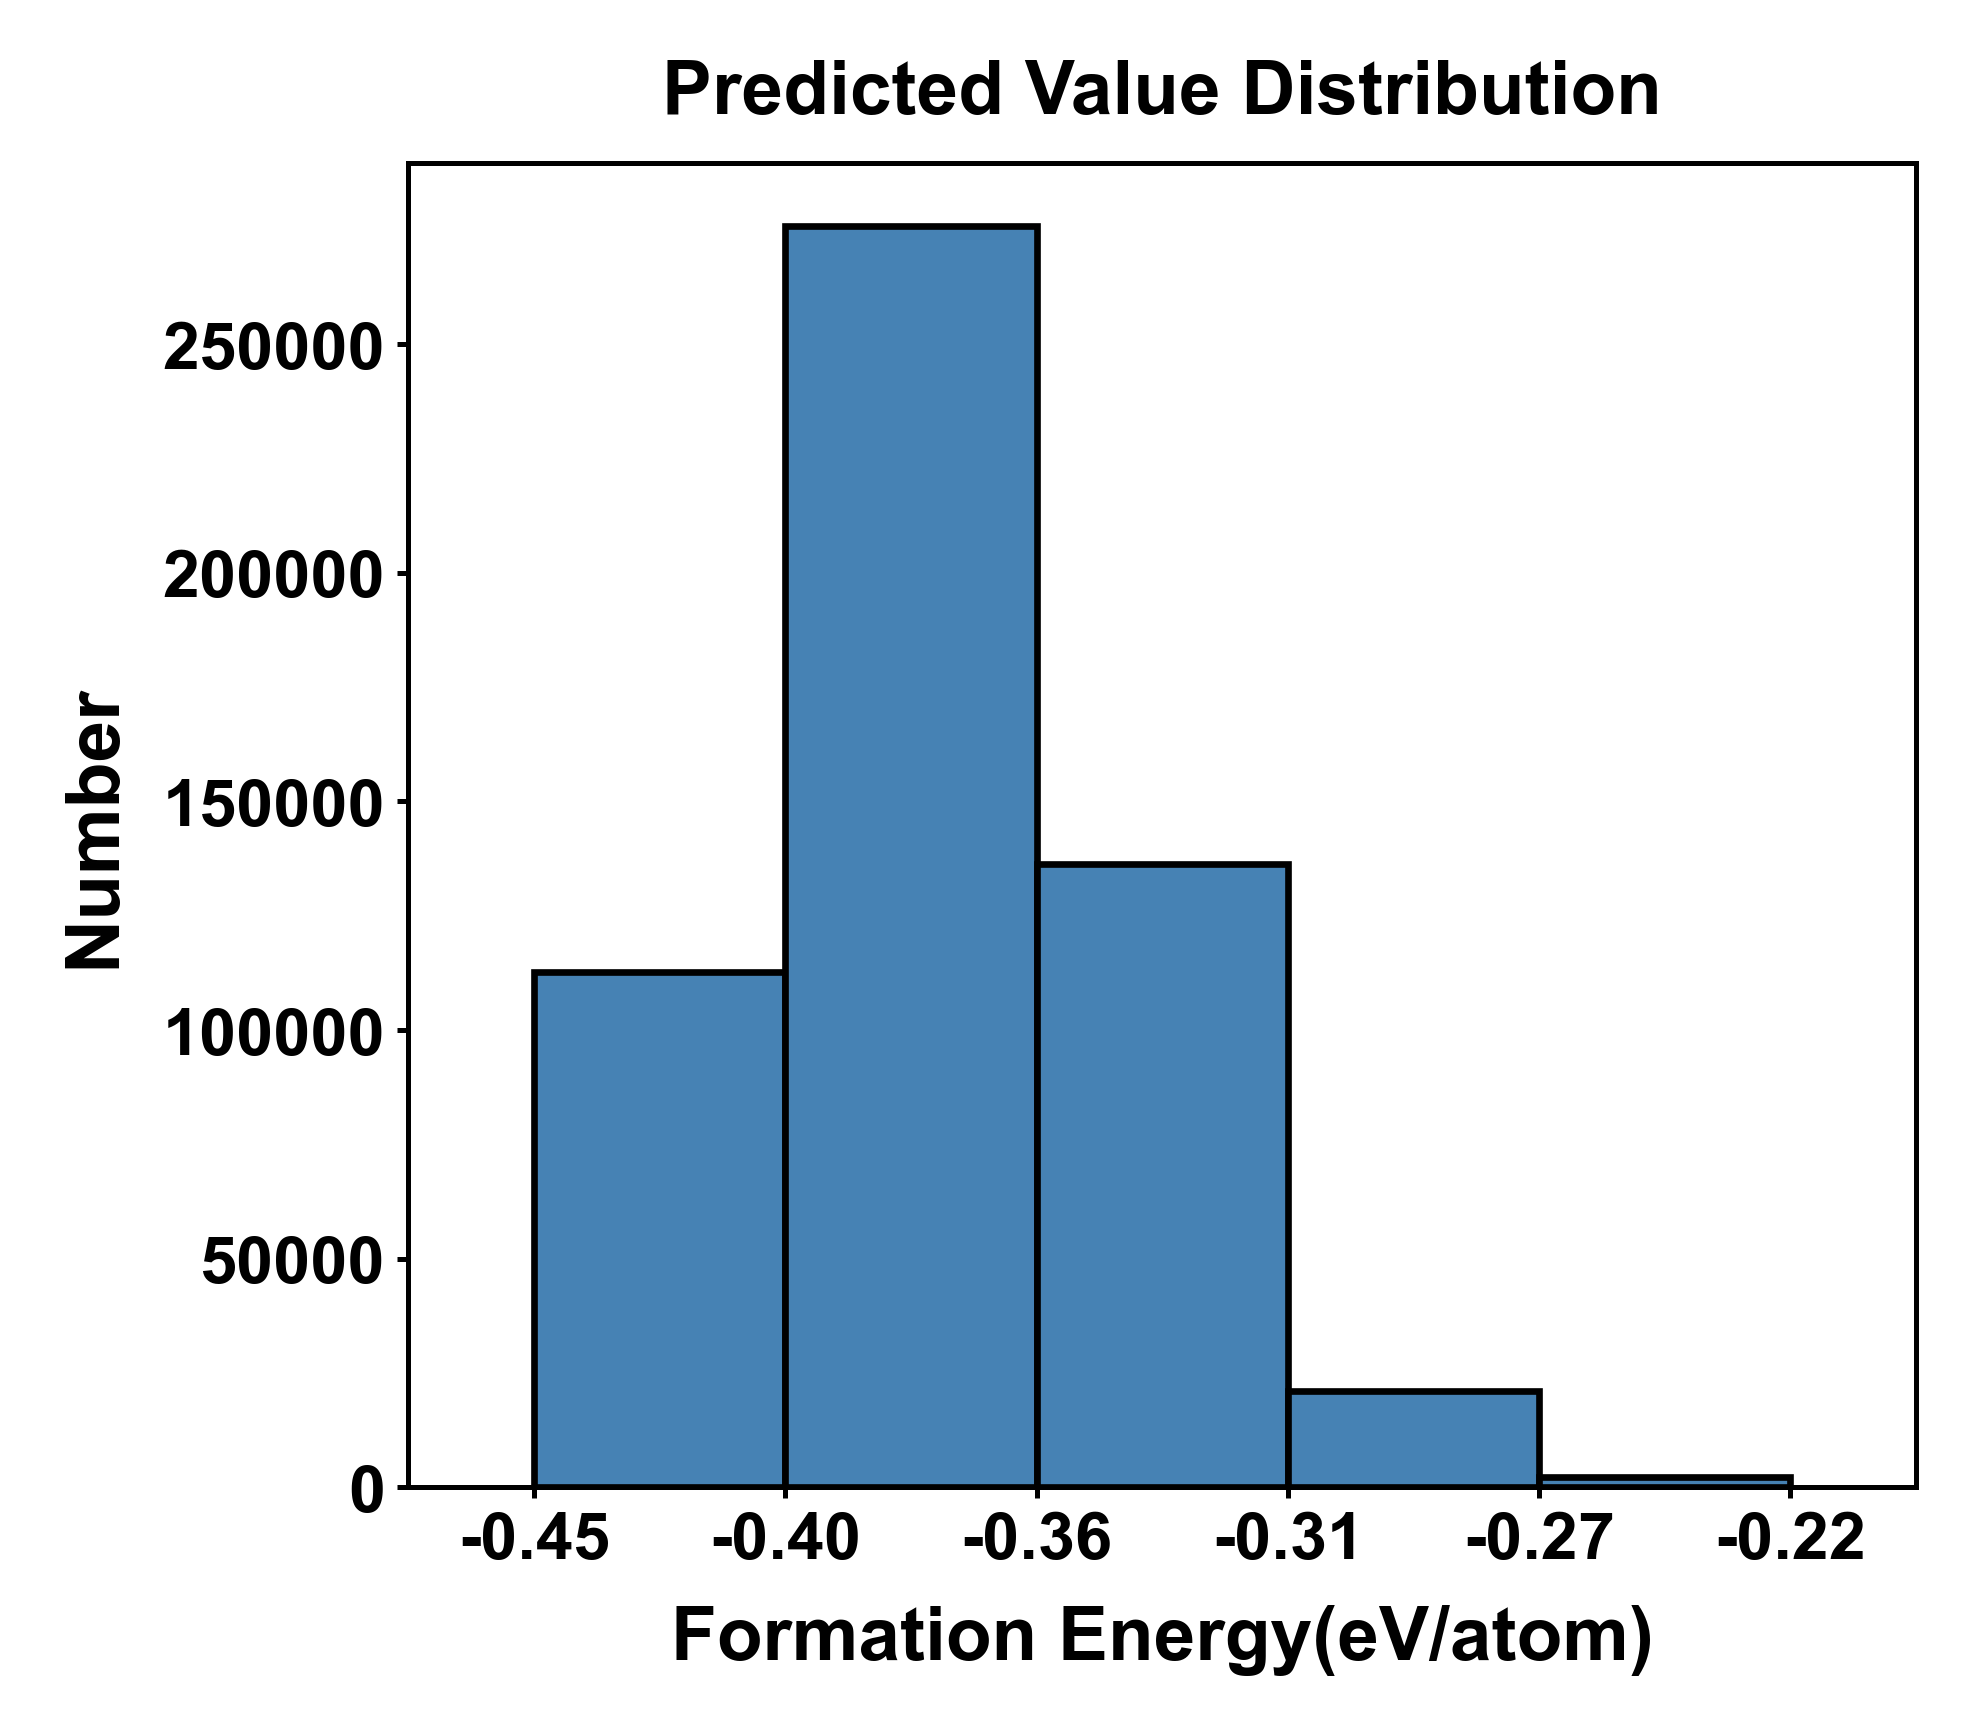

In [24]:

fig, axes = plt.subplots(figsize=(3.2, 2.8))

axes.hist(final_original_all['prediction'], 
            bins=5,
            color='steelblue',
            edgecolor='k')


axes.set_xlabel('Formation Energy(eV/atom)', fontsize=9)
axes.set_ylabel('Number', fontsize=9)
axes.tick_params(axis='both', labelsize=8)

x_min = final_original_all['prediction'].min()
x_max = final_original_all['prediction'].max()
    

axes.set_xlim(x_min - 0.1*(x_max - x_min), x_max + 0.1*(x_max - x_min))
    

x_ticks = np.linspace(x_min, x_max, 6)
axes.set_xticks(x_ticks)


axes.set_xticklabels([f"{tick:.2f}" for tick in x_ticks], rotation=0)
axes.set_title('Predicted Value Distribution', fontsize=9, fontweight='bold')

fig.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

plt.savefig('FED.pdf')
plt.show()

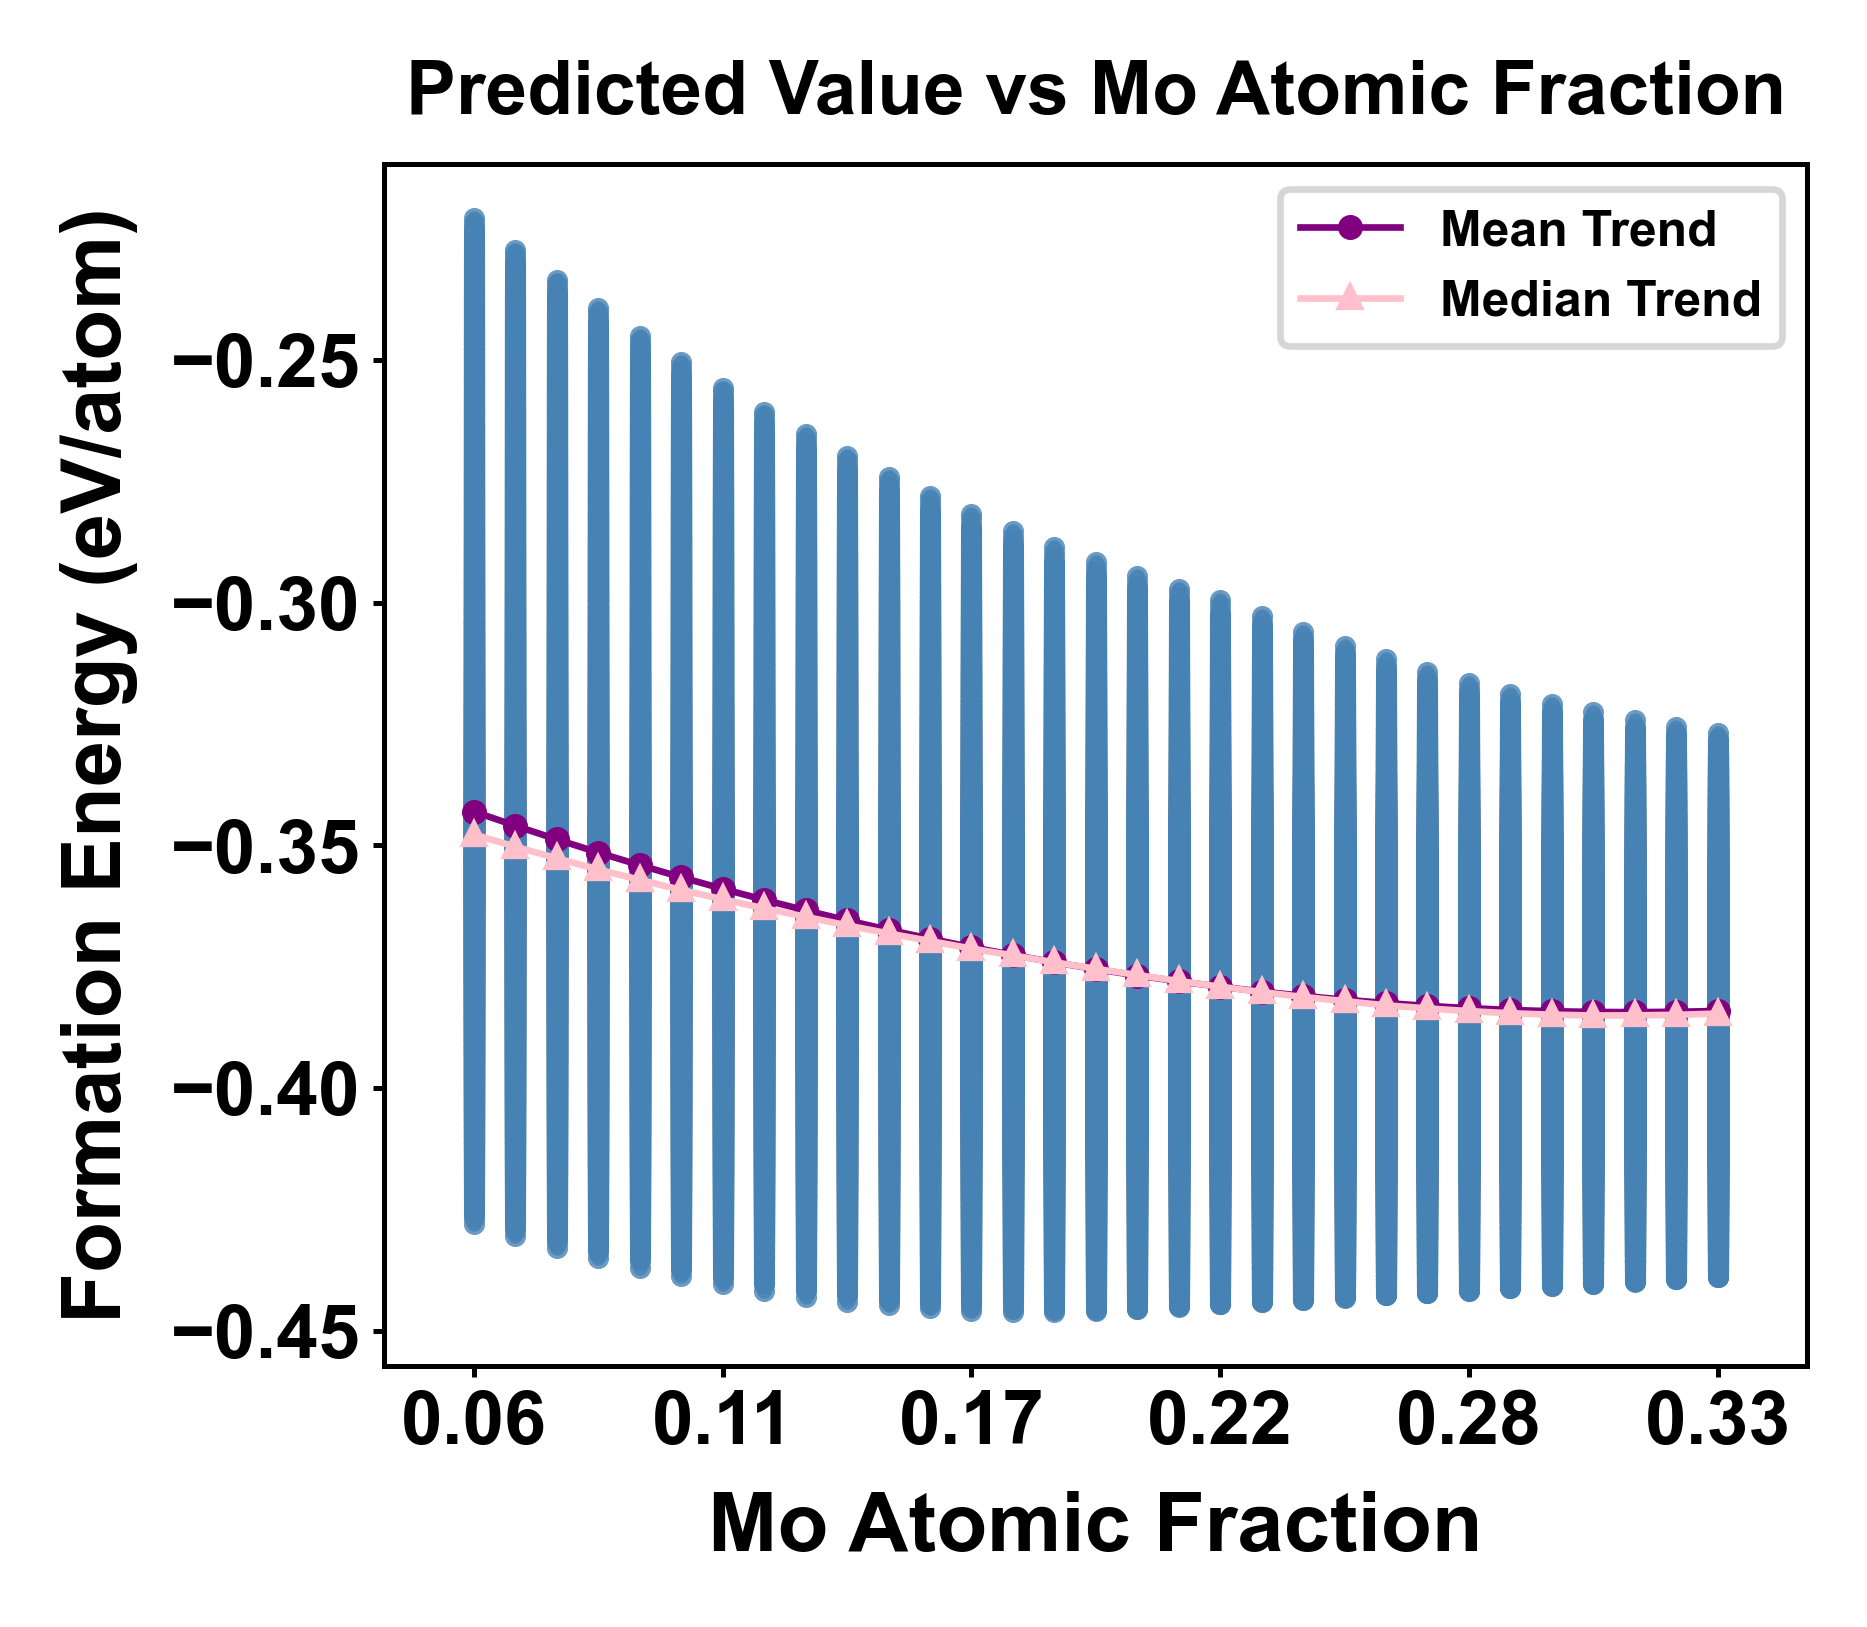

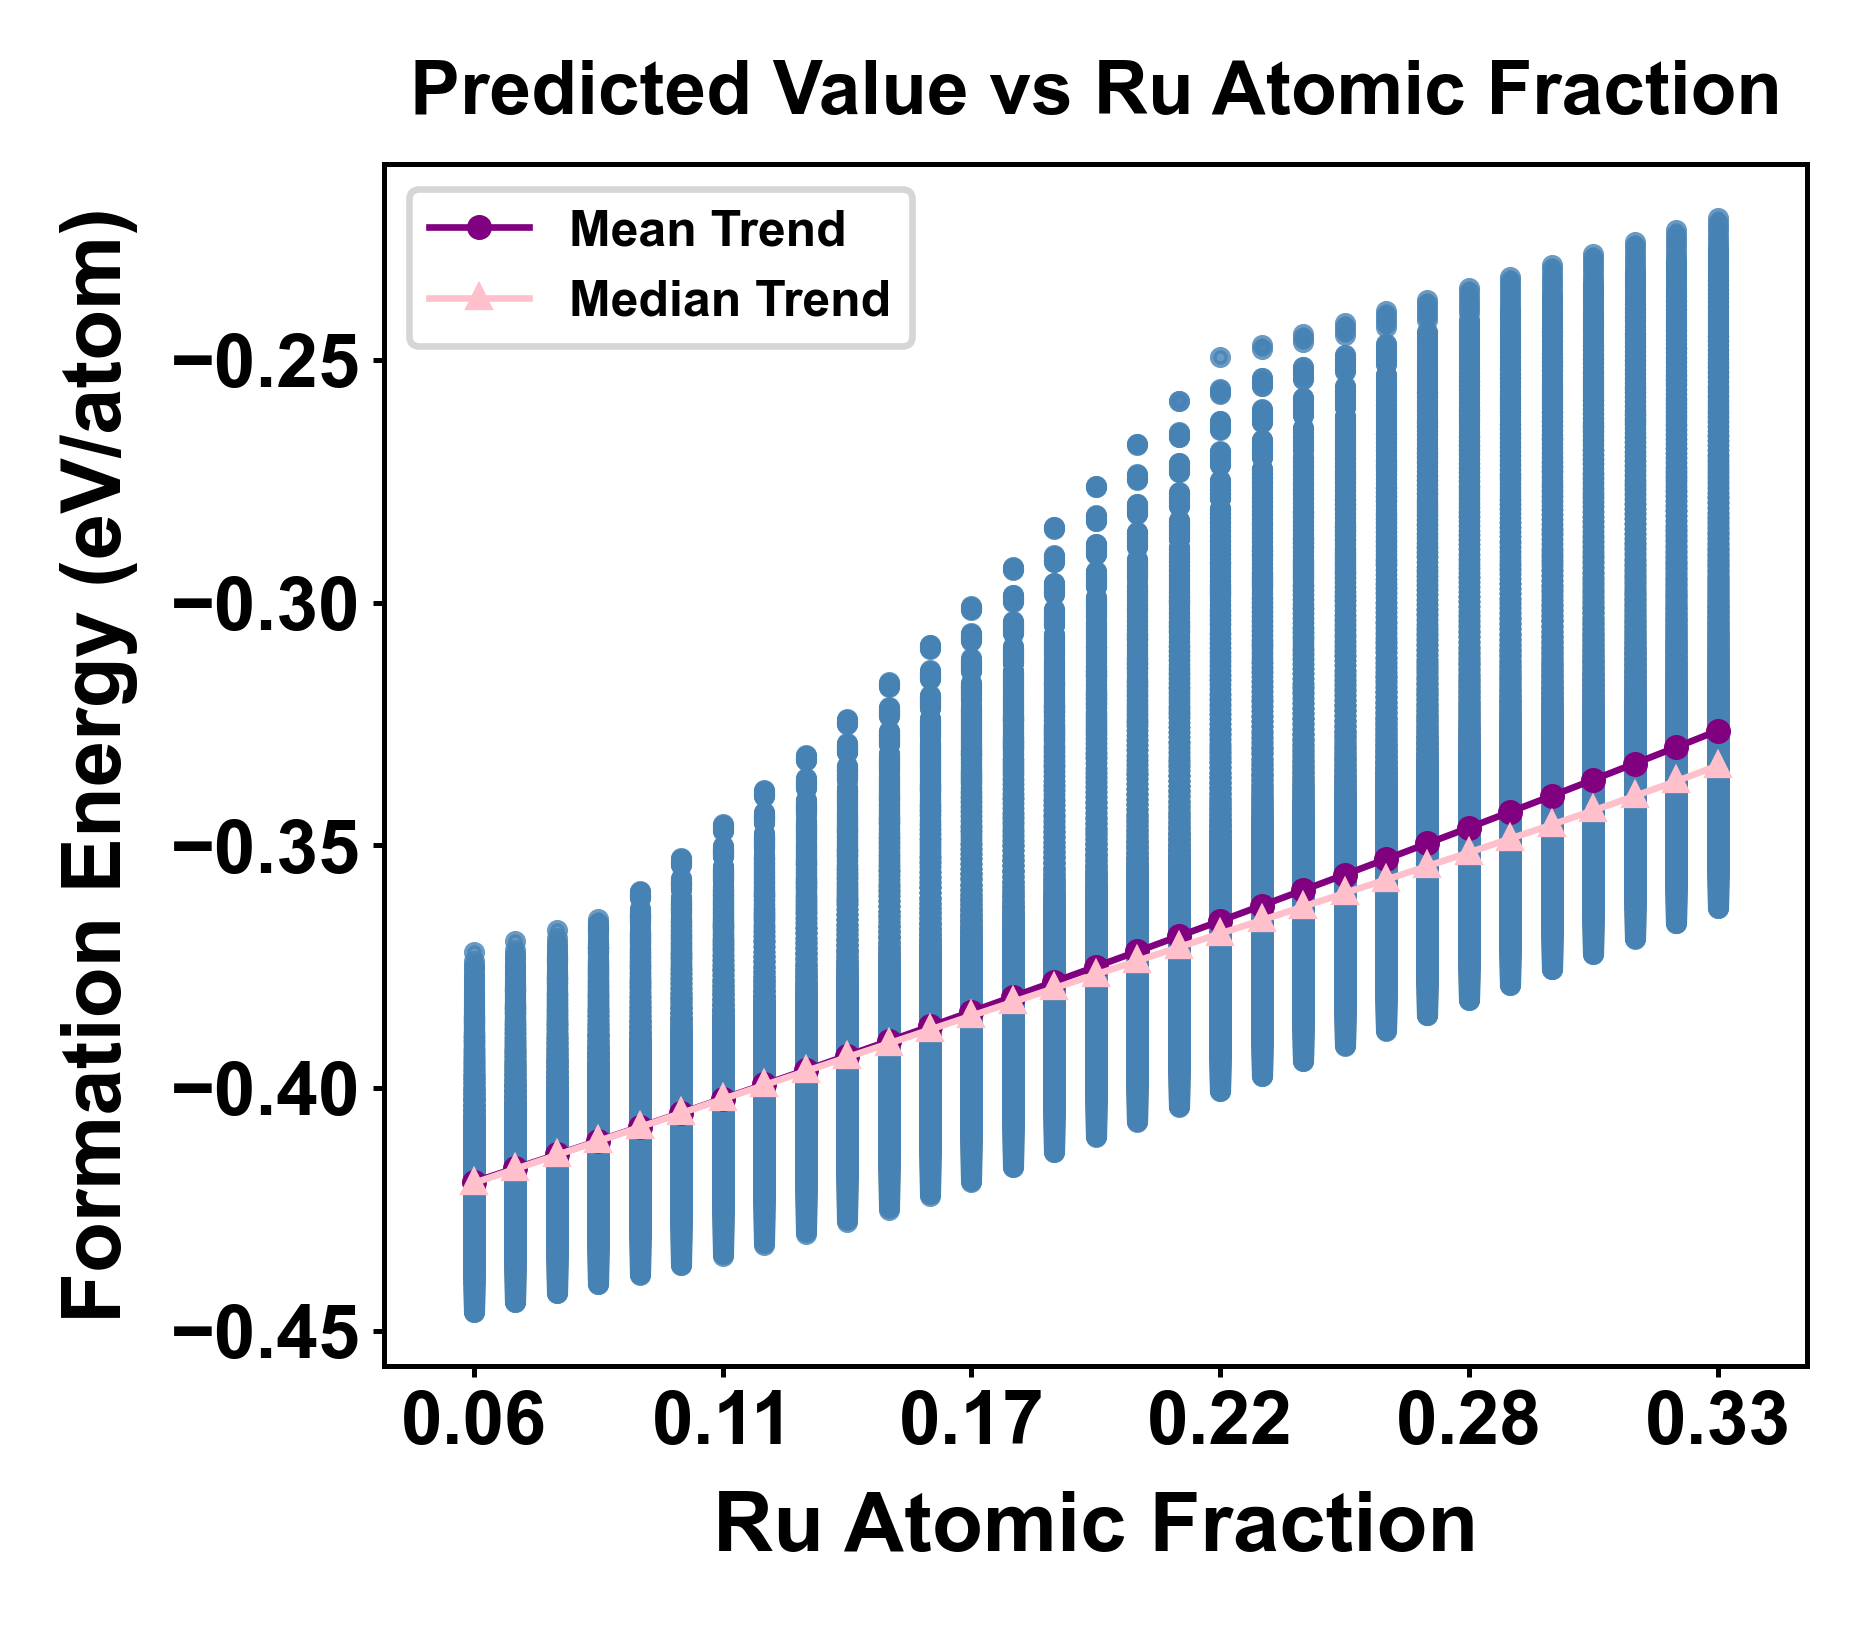

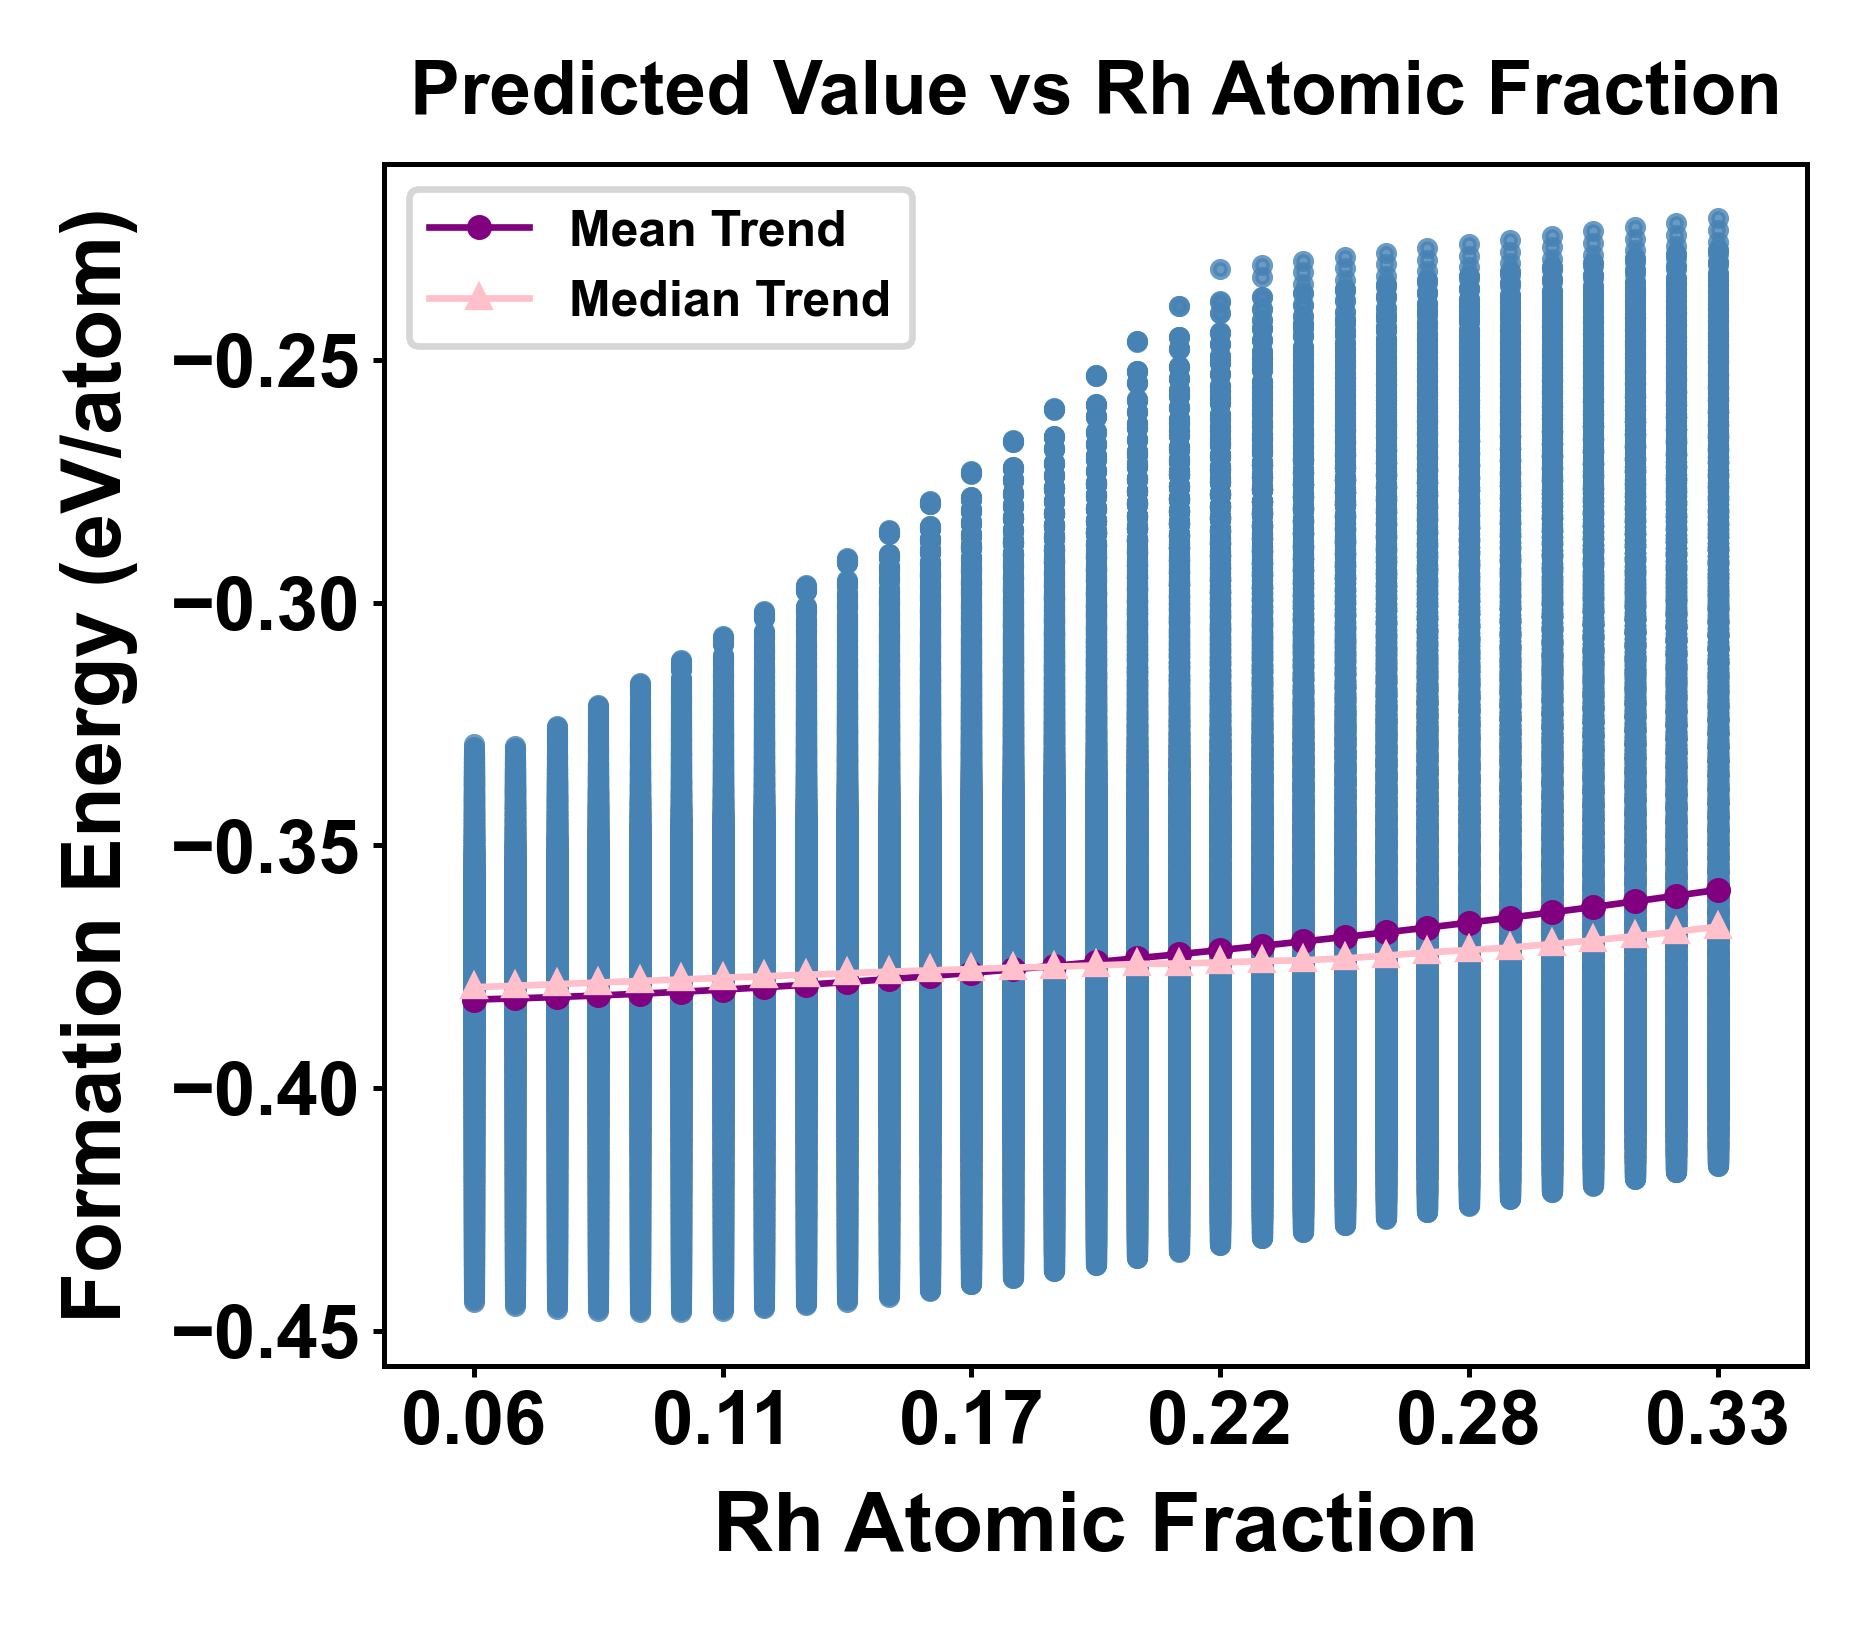

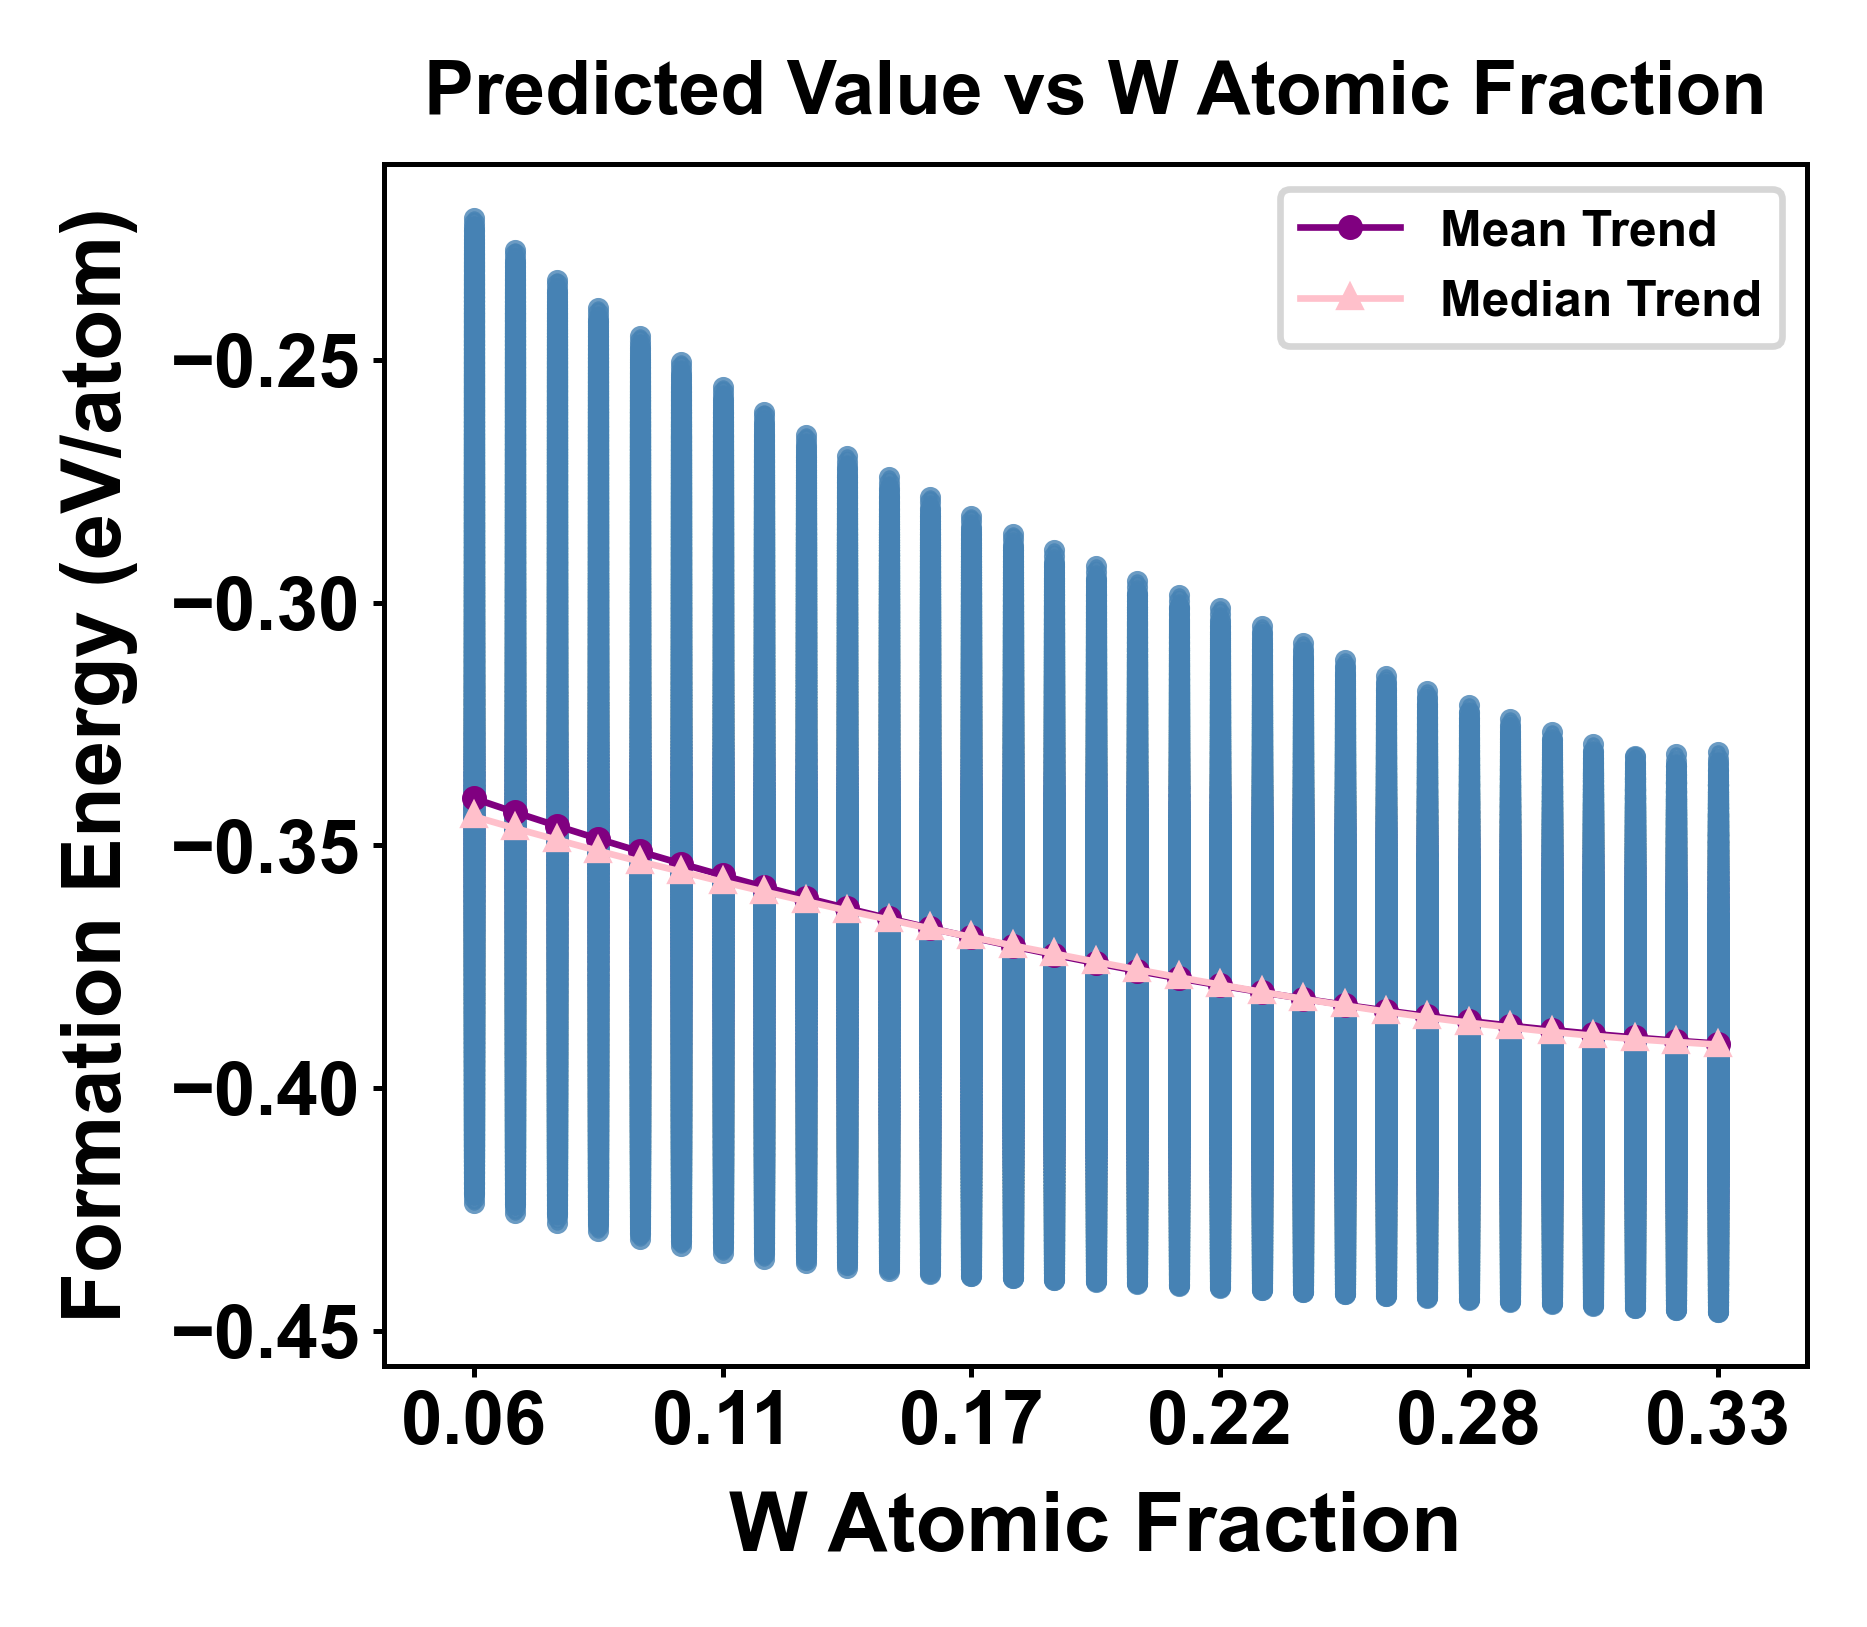

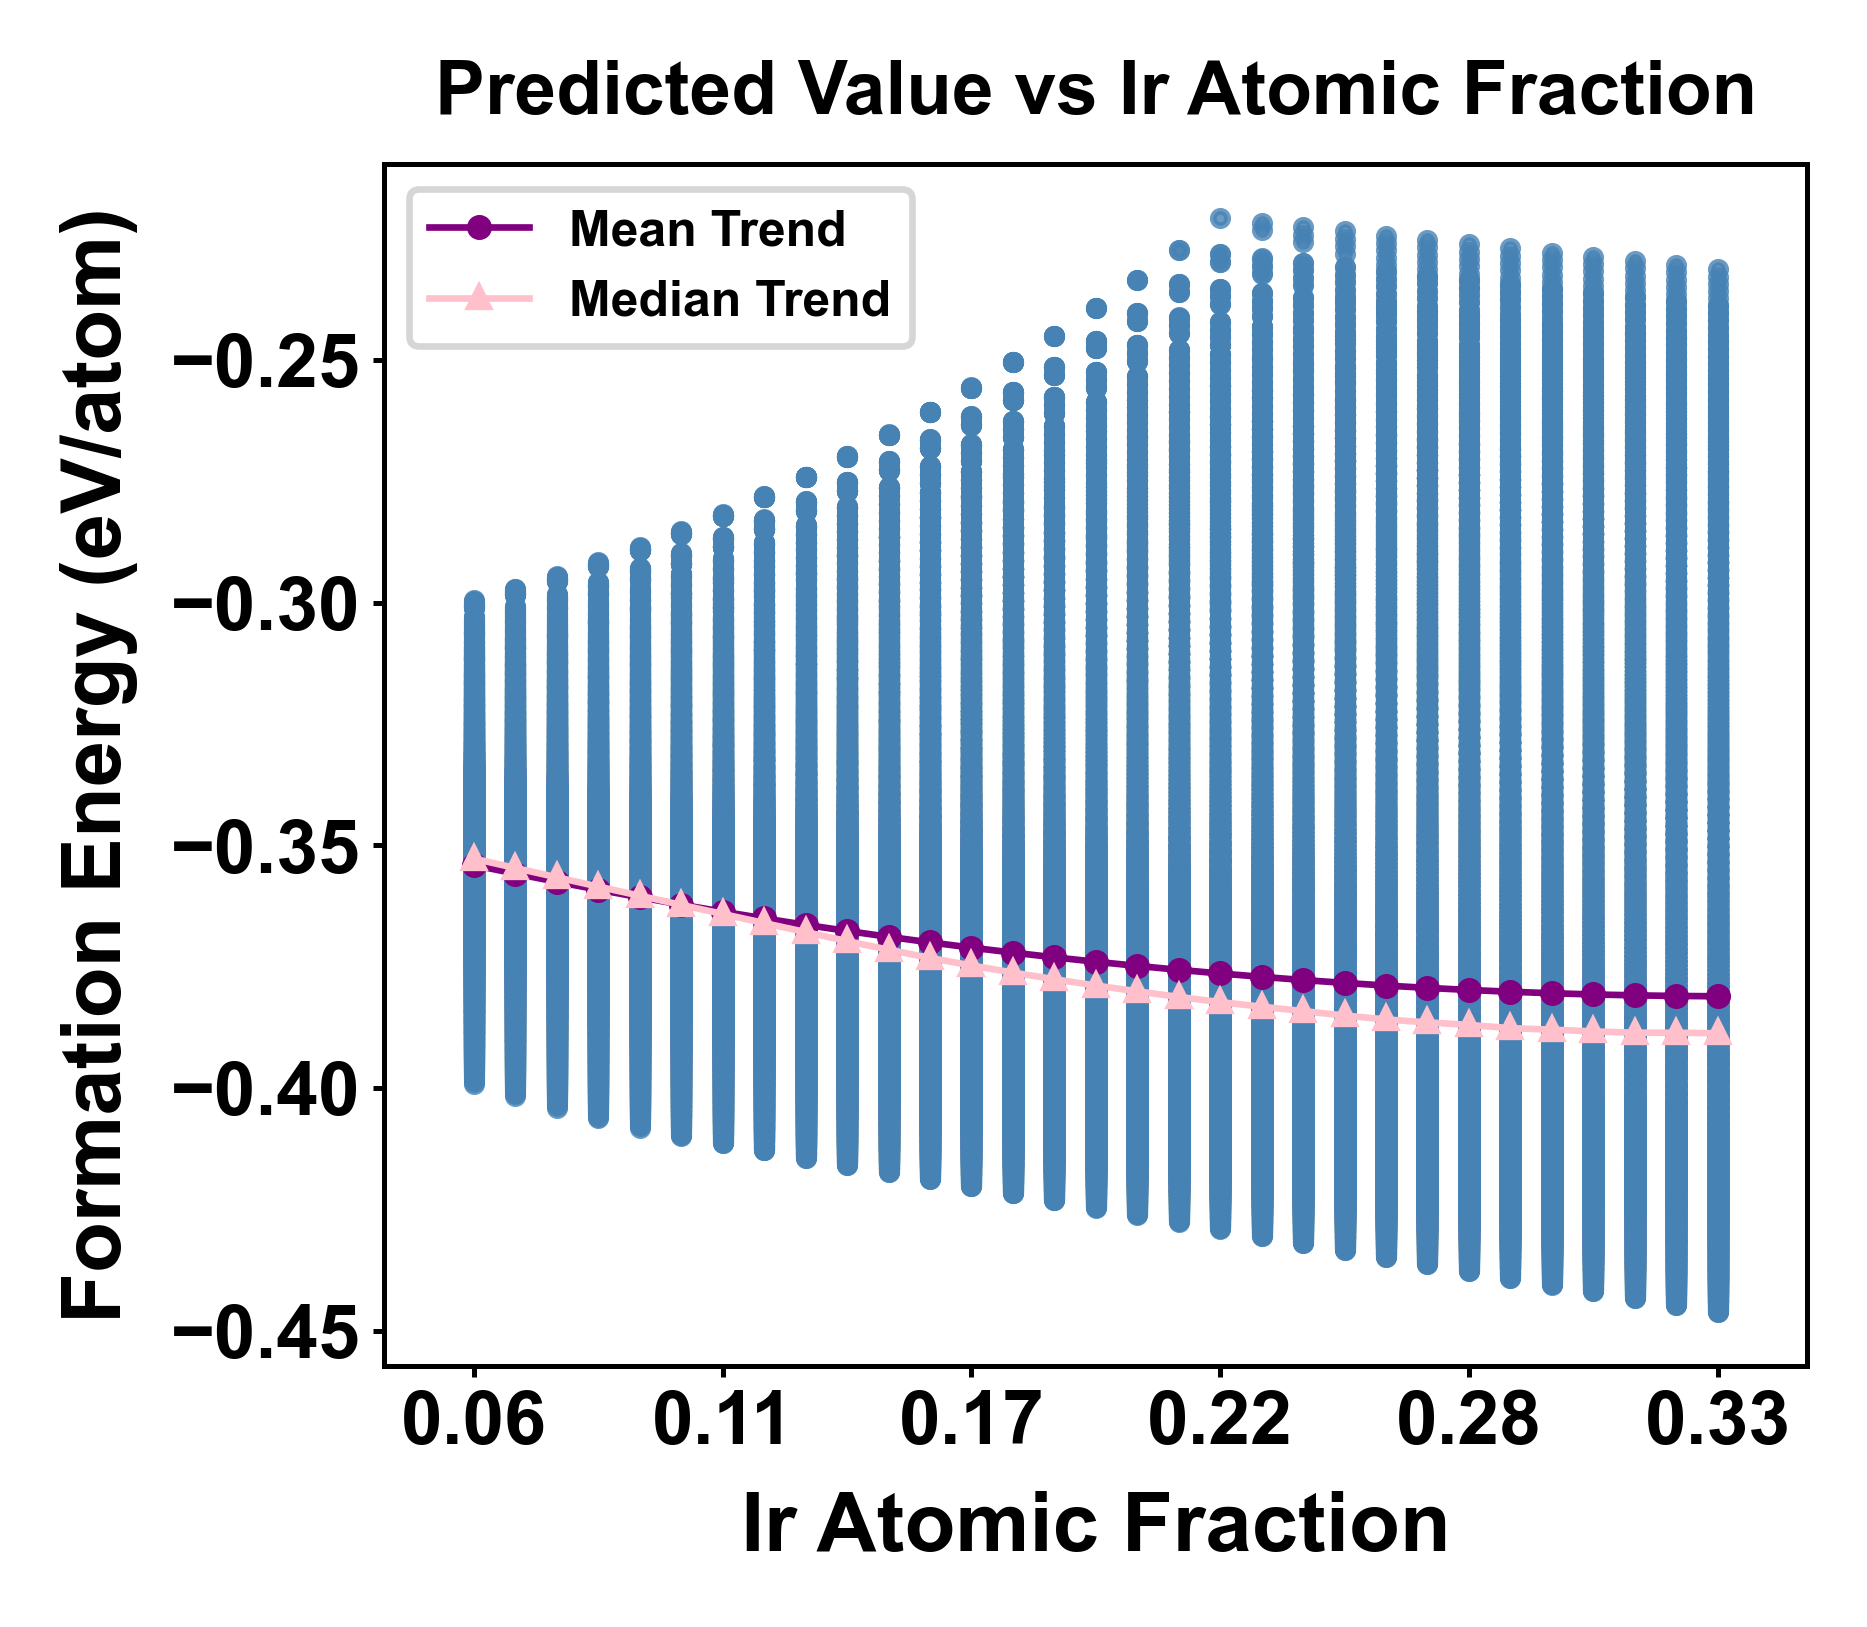

In [25]:
features = ['Mo_P', 'Ru_P', 'Rh_P', 'W_P', 'Ir_P']
x_label = ['Mo Atomic Fraction', 'Ru Atomic Fraction', 'Rh Atomic Fraction', 'W Atomic Fraction', 'Ir Atomic Fraction']


min_x = min(final_original_all[feature].min() for feature in features) - 0.02
max_x = max(final_original_all[feature].max() for feature in features) + 0.02


for i, feature in enumerate(features):
    fig, ax = plt.subplots()
    
    ax.scatter(final_original_all[feature], final_original_all['prediction'], alpha=0.8, s=3, color='steelblue', label=None)
    
    ax.set_xlabel(x_label[i], fontsize=10)
    ax.set_ylabel('Formation Energy (eV/atom)', fontsize=10)
    
    ax.set_xlim(min_x, max_x)
    x_ticks = np.linspace(final_original_all[feature].min(), final_original_all[feature].max(), 6)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{tick:.2f}" for tick in x_ticks], rotation=0)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    ax.set_title(f'Predicted Value vs {x_label[i]}', fontweight='bold', fontsize=9)




    x_vals = np.sort(final_original_all[feature].unique())


    y_means   = [final_original_all.loc[final_original_all[feature] == x, 'prediction'].mean()   for x in x_vals]
    y_medians = [final_original_all.loc[final_original_all[feature] == x, 'prediction'].median() for x in x_vals]


    ax.plot(x_vals, y_means,
            marker='o',
            markersize=2, 
            linestyle='-',
            linewidth=0.8,
            color='purple',
            label='Mean Trend')


    ax.plot(x_vals, y_medians,
            marker='^',
            markersize=2, 
            linestyle='-',
            linewidth=0.8,
            color='pink',
            label='Median Trend')


    ax.legend(fontsize=6)
    


    plt.tight_layout()
    plt.savefig(f'{feature}_prediction.png')
    #plt.savefig(f'{feature}_prediction.pdf')
    plt.show()